<a href="https://colab.research.google.com/github/007sanjib/My-test/blob/master/Project_9_NLP_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter US Airline Sentiment - Problem Statement


## Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

## Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

## Dataset:

The dataset has the following columns:

tweet_id                                                           
airline_sentiment                                               
airline_sentiment_confidence                               
negativereason                                                   
negativereason_confidence                                    
airline                                                                    
airline_sentiment_gold                                              
name     
negativereason_gold 
retweet_count
text
tweet_coord
tweet_created
tweet_location 
user_timezone
 

## Objective:

To implement the techniques learned as a part of the course.


## Learning Outcomes:

Basic understanding of text pre-processing.
What to do after text pre-processing
Bag of words
Tf-idf
Build the classification model.
Evaluate the Model
 

## Steps and tasks:

1. Import the libraries, load dataset, print the shape of data, data description. (4 Marks)
2. Do Exploratory data analysis(EDA) based on the below statement. (9 Marks)
      a. Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. 
      b. Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons. 
      c. Plot the word cloud graph of tweets for positive and negative sentiment separately.
3. Understand of data columns: (3 Marks)
     a. Drop all other columns except “text” and “airline_sentiment”.
     b. Check the shape of the data.
     c. Print the first 5 rows of data.
4. Text pre-processing: Data preparation. (12 Marks)
NOTE:- Each text pre-processing step should be mentioned in the notebook separately.
     a. Html tag removal.
     b. Tokenization.
     c. Remove the numbers.
     d. Removal of Special Characters and Punctuations.
     e. Removal of stopwords
     f. Conversion to lowercase.
     g. Lemmatize or stemming.
     h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)
     i. Print the first 5 rows of data after pre-processing.
5. Vectorization: (8 Marks)
    a. Use CountVectorizer.
    b. Use TfidfVectorizer.
6. Fit, tune(optimize the parameter to improve the accuracy)& evaluate the model using both types
    of vectorization. Print the top 40 features and plot their word cloud using both types of vectorization. (14 Marks)
7. Summarize your understanding of the application of Various Pre-processing and Vectorization and
    the performance of your model on this dataset. (6 Marks)
8.Overall notebook should have:(4 Marks)
     a. Well commented code
     b. Structure and flow

 

## Best Practices for the Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
 

## Submission Guidelines :

The submission should be a well-commented Jupyter notebook [format - .html and .ipynb]
Any assignment found copied/plagiarized with other groups will not be graded and will be awarded zero marks.
Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
Submission will not be evaluated if,
it is submitted post-deadline, or,
more than 2 files are submitted
  

Regards

Program Office

Happy Learning!


## Scoring guide (Rubric) - Twitter US Airline Sentiment

### Criteria	Points

Data Summary
Add your view and opinion along with the problem statement, shape of the data, data description.
4

Exploratory data analysis
Plot all (a,b and c) of the graphs that are mentioned in the 2nd section of the problem statement. Mention the observations & insights after plotting each graph.
9

Understanding of Data Columns
Drop unnecessary columns, chek shape of the data, print 1st few rows of data.
3

Data Pre - Processing
Apply all necessary pre-processing steps for this task. Print the first few rows of data after pre-processing.
12

Vectorization
Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model
8

Modelling , tuning and Evaluation
- Fit the model using vectorized column - Tune the model to improve the accuracy - Evaluate the model using the confusion matrix - Print the top 40 features and plot their word cloud using both types of vectorization. (7+7 Marks)
14

Conclusion
- Summary from the understanding of the application of Various Pre-processing, Vectorization, and performance of the model on the dataset.
6

Overall Structure and flow ofNotebook
Structure and flow Well commented code
4

Points	60


# Project Solution - The Answer by Sanjib: 

Date : Oct-31-2021

Author : Sanjib K Basu

*Note: Google Colab provides Table of Contents on the left top menu*




In [1]:
!python --version

Python 3.7.12


In [2]:
!pip install pandas-profiling==2.8.0 --user pandas-profiling



In [3]:
!pip install emoji
# !pip install emot --upgrade
# !pip install demoji

In [4]:
!pip install bs4

In [5]:

!pip install contractions

In [6]:
# Import necessary libraries.
import cv2
from google.colab.patches import cv2_imshow

import os

import pandas as pd
import numpy as np
import pandas_profiling as pf

import copy

from datetime import datetime

import seaborn as sns # for data visualization 
import tensorflow as tf
import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob

from bs4 import BeautifulSoup    
import contractions   

import emoji

import re, string, unicodedata 
import pickle

# import emot
# from emot.emo_unicode import UNICODE_EMO, EMOTICONS

from sklearn.utils import class_weight 

from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from gensim.models import Word2Vec

from tensorflow.keras.preprocessing.text import Tokenizer                        # Text tokenization utility class.
from tensorflow.keras.preprocessing.sequence import pad_sequences                # Pads sequences to the same length.
from tensorflow.keras.models import Sequential                                   # 
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional      #Keras layers API.

import tensorflow_datasets as tfds


# Model hyper parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    make_scorer
)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import nltk
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

import pickle
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', None) # prints the DataFrame cells with full text, none of its values truncated.
pd.set_option('display.max_columns', 100) # prints upto 100 columns
pd.set_option('display.max_rows', 200) # prints upto 200 rows
pd.set_option('display.colheader_justify', 'left') # dataframe column header left justified

pd.options.display.float_format = (
    "{:,.4f}".format
)  # format upto 4 decimals of float numbers

sns.set(color_codes=True)  # keeps the colored grid in the plot background
sns.set_context("talk")  # talk : bolds the plots
plt.style.use("seaborn-notebook")  # set a default style while plotting

In [7]:
print(tf.__version__)

2.6.0


# 1. Overview of the Dataset

 Load the data and perform priliminary analysis

In [8]:
# mount the G drive
from google.colab import drive
drive.mount('/content/drive' ,force_remount=False) #force_remount=True

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!ls /content/drive/MyDrive/Colab\ Notebooks


'Copy of Project_9_NLP_Twitter_Sentiment_Analysis.ipynb'   tweet-clean_bak1.csv
 images.npy						   tweet-clean.csv
 Labels.csv						   Tweets.csv
 Project_8_Plant_Seedling_Classification.ipynb		   UT-Austin
 Project_9_NLP_Twitter_Sentiment_Analysis.ipynb


In [10]:
df_tweets = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tweets.csv")

df_tweets

tweet_id           airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513   neutral         1.0000                          
1      570301130888122368  positive         0.3486                          
2      570301083672813571   neutral         0.6837                          
3      570301031407624196  negative         1.0000                          
4      570300817074462722  negative         1.0000                          
...                   ...               ...                           ...   
14635  569587686496825344  positive         0.3487                          
14636  569587371693355008  negative         1.0000                          
14637  569587242672398336   neutral         1.0000                          
14638  569587188687634433  negative         1.0000                          
14639  569587140490866689   neutral         0.6771                          

      negativereason           negativereason_confidence airline          \
0                         NaN    nan                      Virgin America   
1                         NaN 0.0000                      Virgin America   
2                         NaN    nan                      Virgin America   
3                  Bad Flight 0.7033                      Virgin America   
4                  Can't Tell 1.0000                      Virgin America   
...                       ...                        ...             ...   
14635                     NaN 0.0000                            American   
14636  Customer Service Issue 1.0000                            American   
14637                     NaN    nan                            American   
14638  Customer Service Issue 0.6659                            American   
14639                     NaN 0.0000                            American   

      airline_sentiment_gold name             negativereason_gold  \
0      NaN                            cairdin  NaN                  
1      NaN                           jnardino  NaN                  
2      NaN                         yvonnalynn  NaN                  
3      NaN                           jnardino  NaN                  
4      NaN                           jnardino  NaN                  
...                      ...              ...                 ...   
14635  NaN                    KristenReenders  NaN                  
14636  NaN                           itsropes  NaN                  
14637  NaN                           sanyabun  NaN                  
14638  NaN                         SraJackson  NaN                  
14639  NaN                          daviddtwu  NaN                  

       retweet_count  \
0      0               
1      0               
2      0               
3      0               
4      0               
...              ...   
14635  0               
14636  0               
14637  0               
14638  0               
14639  0               

      text                                                                                                                                                     \
0                                                                                                                         @VirginAmerica What @dhepburn said.   
1                                                                                    @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                                                     @VirginAmerica I didn't today... Must mean I need to take another trip!   
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
...                                                                                  

In [11]:
df_tweets.info() # checking null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [12]:
df_tweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [13]:
df_tweets.describe(include="all").T


count       unique top                          \
tweet_id                     14,640.0000    NaN                         NaN   
airline_sentiment                  14640      3                    negative   
airline_sentiment_confidence 14,640.0000    NaN                         NaN   
negativereason                      9178     10      Customer Service Issue   
negativereason_confidence    10,522.0000    NaN                         NaN   
airline                            14640      6                      United   
airline_sentiment_gold                40      3                    negative   
name                               14640   7701                 JetBlueNews   
negativereason_gold                   32     13      Customer Service Issue   
retweet_count                14,640.0000    NaN                         NaN   
text                               14640  14427              @united thanks   
tweet_coord                         1019    832                  [0.0, 0.0]   
tweet_created                      14640  14247   2015-02-24 09:54:34 -0800   
tweet_location                      9907   3081                  Boston, MA   
user_timezone                       9820     85  Eastern Time (US & Canada)   

                             freq  mean                          \
tweet_id                       NaN 569,218,351,767,382,528.0000   
airline_sentiment             9178                          NaN   
airline_sentiment_confidence   NaN                       0.9002   
negativereason                2910                          NaN   
negativereason_confidence      NaN                       0.6383   
airline                       3822                          NaN   
airline_sentiment_gold          32                          NaN   
name                            63                          NaN   
negativereason_gold             12                          NaN   
retweet_count                  NaN                       0.0827   
text                             6                          NaN   
tweet_coord                    164                          NaN   
tweet_created                    5                          NaN   
tweet_location                 157                          NaN   
user_timezone                 3744                          NaN   

                             std                       \
tweet_id                     779,111,158,481,836.7500   
airline_sentiment                                 NaN   
airline_sentiment_confidence                   0.1628   
negativereason                                    NaN   
negativereason_confidence                      0.3304   
airline                                           NaN   
airline_sentiment_gold                            NaN   
name                                              NaN   
negativereason_gold                               NaN   
retweet_count                                  0.7458   
text                                              NaN   
tweet_coord                                       NaN   
tweet_created                                     NaN   
tweet_location                                    NaN   
user_timezone                                     NaN   

                             min                           \
tweet_id                     567,588,278,875,213,824.0000   
airline_sentiment                                     NaN   
airline_sentiment_confidence                       0.3350   
negativereason                                        NaN   
negativereason_confidence                          0.0000   
airline                                               NaN   
airline_sentiment_gold                                NaN   
name                                                  NaN   
negativereason_gold                                   NaN   
retweet_count                                      0.0000   
text                                                  NaN   
tweet_coord                                   

### Observation by Sanjib:

1. The data is spread over 85 time zones and 3081 locations. Next, we can check the distribution of tweet_created. Thereafter, the sample dataset may be assumed to be good representation of the population of data.

2. 

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


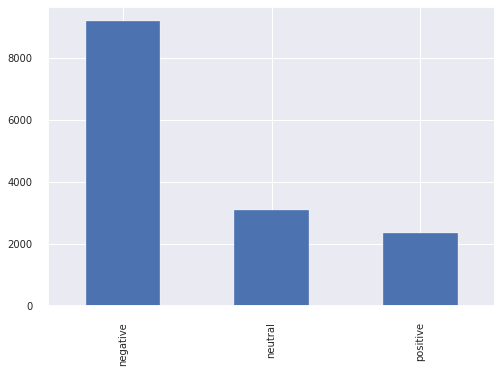

In [14]:
print(df_tweets["airline_sentiment"].value_counts())

df_tweets["airline_sentiment"].value_counts().plot(kind="bar")

### Observation by Sanjib:

1. The "airline_sentiment" is likely to be the target variable, we'll confirm with futher EDA. The variable "airline_sentiment" does not have any missing value.

In [15]:
df_tweets["airline_sentiment"].value_counts(normalize=True)

negative   0.6269
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64

# 2. Exploratory Data Analysis:

In [16]:
%%time
df_tweets.profile_report(title="Pandas Profiling of Tweet Data")


CPU times: user 31.5 ms, sys: 97 µs, total: 31.6 ms
Wall time: 31.3 ms


Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
print("Mininum tweet_created =",min(pd.to_datetime(df_tweets["tweet_created"])),
      "Maximum tweet_created =", max(pd.to_datetime(df_tweets["tweet_created"])))

Mininum tweet_created = 2015-02-16 23:36:05-08:00 Maximum tweet_created = 2015-02-24 11:53:37-08:00


In [18]:
%%time

column_categories = ["airline", 
                     "retweet_count",
                     "user_timezone", 
                     "name",
                     "negativereason",
                     "tweet_location", 
                      ]

for col in column_categories:
    print("="*40, col)
    print(df_tweets[col].value_counts() )



======================================== airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64
======================================== retweet_count
0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
9         1
31        1
18        1
15        1
28        1
44        1
11        1
Name: retweet_count, dtype: int64
======================================== user_timezone
Eastern Time (US & Canada)     3744
Central Time (US & Canada)     1931
Pacific Time (US & Canada)     1208
Quito                           738
Atlantic Time (Canada)          497
Mountain Time (US & Canada)     369
Arizona                         229
London                          195
Alaska                          108
Sydney                          107
Hawaii                          104
Amsterdam                    

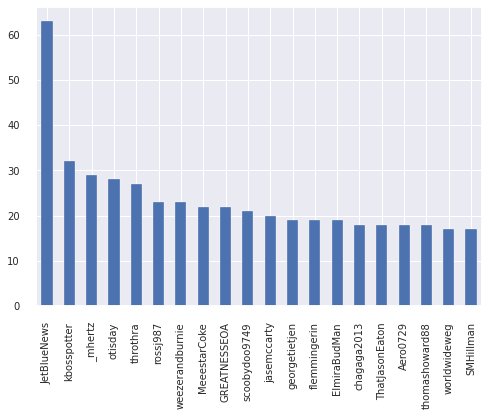

In [19]:
# top 20 users by number of tweets
df_tweets["name"].value_counts().head(20).plot(kind="bar");

### Observation by Sanjib:
1. The JetBlueNews mention (name) looks like sponsored by company, and would never tweet negative sentiment.


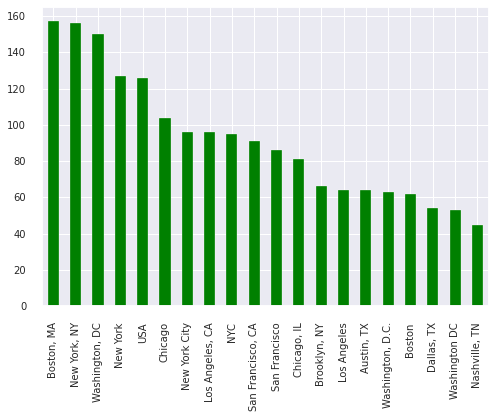

In [20]:
# top 20 locations by number of tweets
df_tweets["tweet_location"].value_counts().head(20).plot(kind="bar",
                                                         color="Green");

In [21]:
df_pivot = pd.pivot_table(
    data=df_tweets ,
    columns="airline",
    index="negativereason",
    values="tweet_id",
    aggfunc=np.count_nonzero,
)
df_pivot

airline                      American  Delta  Southwest  US Airways  United  \
negativereason                                                                
Bad Flight                    87        64     90        104         216      
Can't Tell                   198       186    159        246         379      
Cancelled Flight             246        51    162        189         181      
Customer Service Issue       768       199    391        811         681      
Damaged Luggage               12        11     14         11          22      
Flight Attendant Complaints   87        60     38        123         168      
Flight Booking Problems      130        44     61        122         144      
Late Flight                  249       269    152        453         525      
Lost Luggage                 149        57     90        154         269      
longlines                     34        14     29         50          48      

airline                      Virgin America  
negativereason                               
Bad Flight                   19              
Can't Tell                   22              
Cancelled Flight             18              
Customer Service Issue       60              
Damaged Luggage               4              
Flight Attendant Complaints   5              
Flight Booking Problems      28              
Late Flight                  17              
Lost Luggage                  5              
longlines                     3

In [22]:
df_pivot = pd.pivot_table(
    data=df_tweets ,
    columns="retweet_count",
    index="negativereason",
    values="tweet_id",
    aggfunc=np.count_nonzero,
)
df_pivot

retweet_count                0          1        2       3      4      5      \
negativereason                                                                 
Bad Flight                    541.0000  35.0000  2.0000 2.0000    nan    nan   
Can't Tell                  1,099.0000  74.0000  4.0000 5.0000 3.0000    nan   
Cancelled Flight              803.0000  33.0000  7.0000 1.0000 2.0000 1.0000   
Customer Service Issue      2,721.0000 166.0000 17.0000 3.0000 3.0000    nan   
Damaged Luggage                72.0000   1.0000     nan    nan 1.0000    nan   
Flight Attendant Complaints   442.0000  35.0000  3.0000 1.0000    nan    nan   
Flight Booking Problems       503.0000  20.0000  3.0000    nan 1.0000 1.0000   
Late Flight                 1,558.0000 102.0000  3.0000    nan 1.0000    nan   
Lost Luggage                  673.0000  49.0000  2.0000    nan    nan    nan   
longlines                     169.0000   9.0000     nan    nan    nan    nan   

retweet_count                7      18     22     31     32     44     
negativereason                                                         
Bad Flight                     nan    nan    nan    nan    nan    nan  
Can't Tell                  1.0000 1.0000 1.0000 1.0000 1.0000    nan  
Cancelled Flight               nan    nan    nan    nan    nan    nan  
Customer Service Issue         nan    nan    nan    nan    nan    nan  
Damaged Luggage                nan    nan    nan    nan    nan    nan  
Flight Attendant Complaints    nan    nan    nan    nan    nan    nan  
Flight Booking Problems     1.0000    nan    nan    nan    nan    nan  
Late Flight                    nan    nan    nan    nan    nan 1.0000  
Lost Luggage                   nan    nan    nan    nan    nan    nan  
longlines                      nan    nan    nan    nan    nan    nan

In [23]:
# df_pivot*100.0/df_tweets.shape[0]



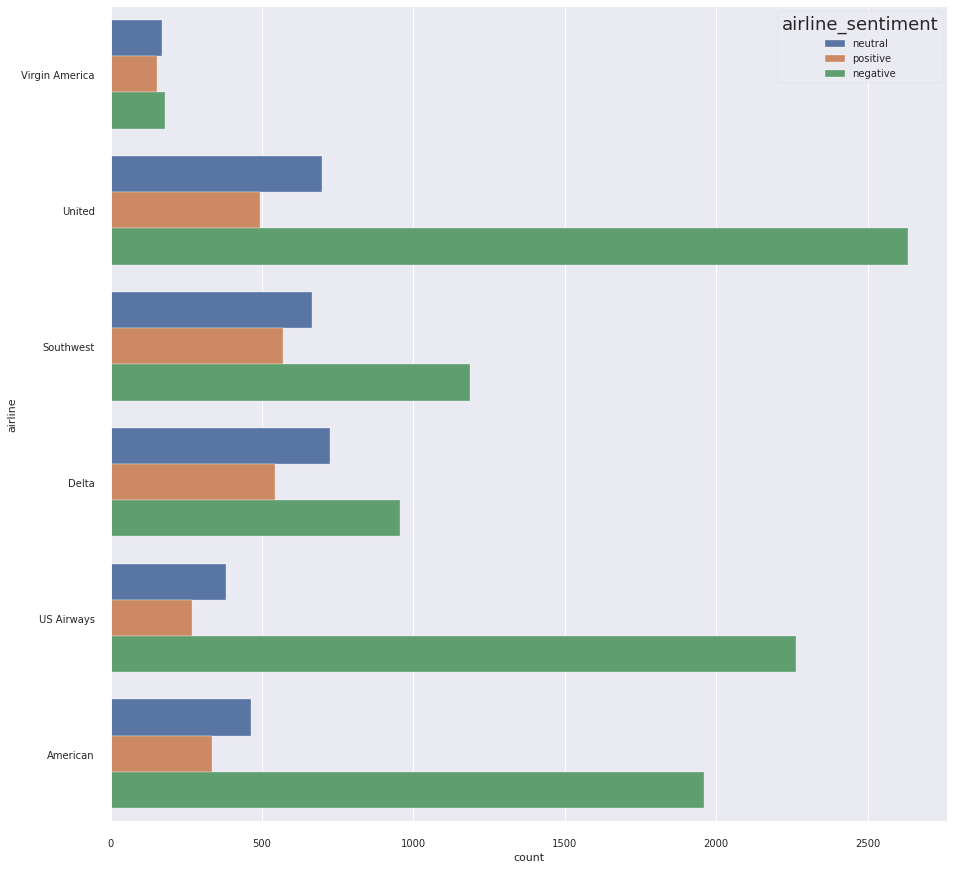

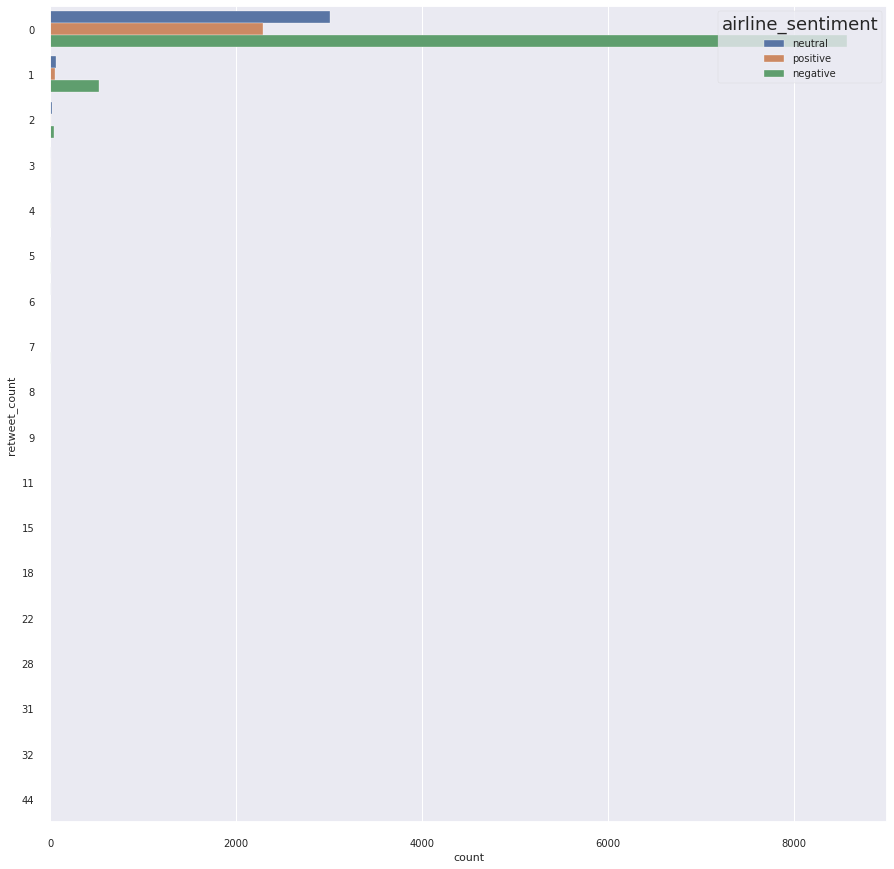

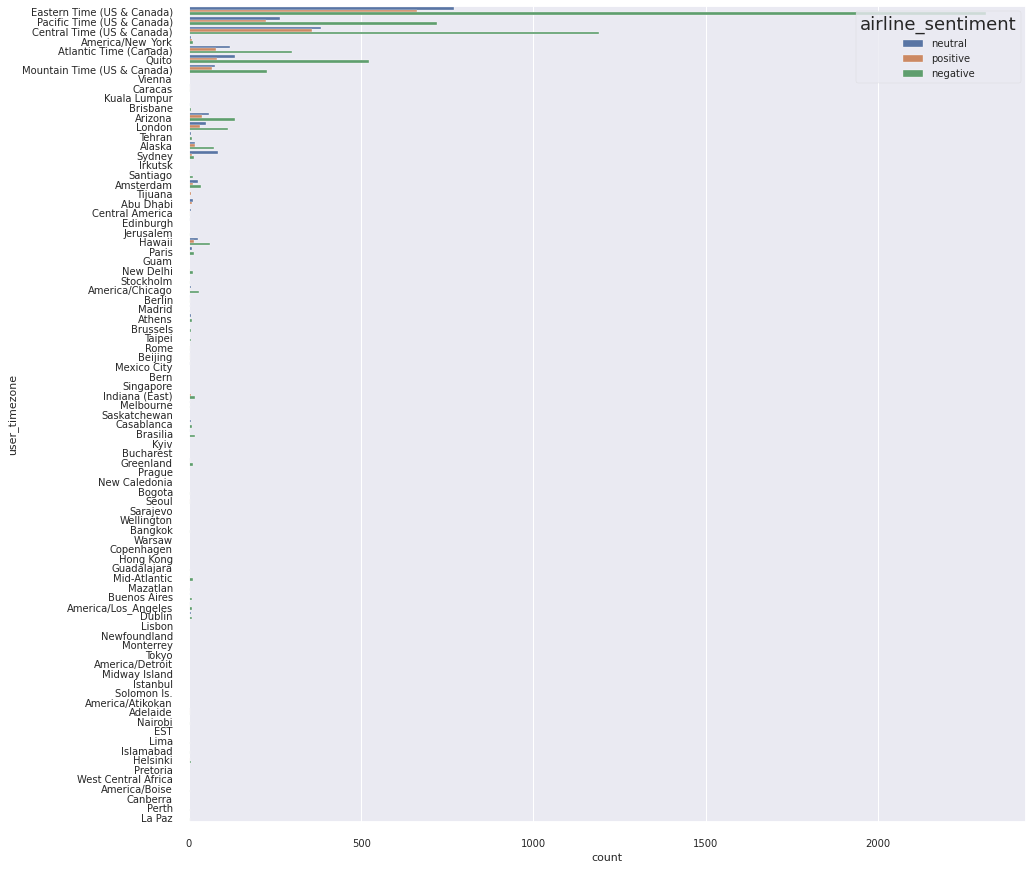

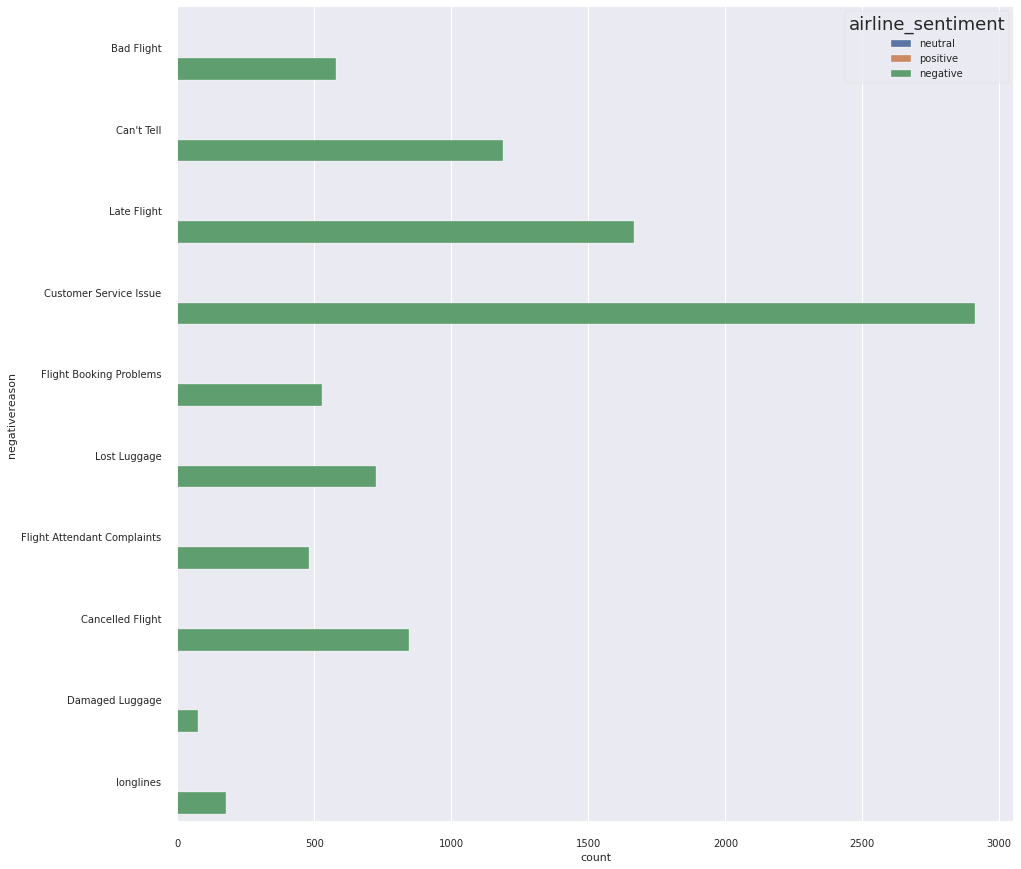

CPU times: user 2.58 s, sys: 104 ms, total: 2.69 s
Wall time: 2.63 s


In [24]:
%%time

column_categories = ["airline", 
                     "retweet_count",
                     "user_timezone", 
                     "negativereason"
                    #  "name",
                    #  "tweet_location", 
                      ]

for col in column_categories:
  plt.figure(figsize=(15,15))
  sns.countplot(data=df_tweets,
              # y="tweet_id",
              y=col,
              hue="airline_sentiment"
              )
  plt.show()

In [25]:
df_pivot = pd.pivot_table(
    data=df_tweets ,
    columns="airline_sentiment",
    index="retweet_count",
    values="tweet_id",
    aggfunc=np.count_nonzero,
)
df_pivot

airline_sentiment  negative   neutral    positive 
retweet_count                                     
0                 8,581.0000 3,005.0000 2,287.0000
1                   524.0000    63.0000    53.0000
2                    41.0000    16.0000     9.0000
3                    12.0000     7.0000     3.0000
4                    11.0000     2.0000     4.0000
5                     2.0000     2.0000     1.0000
6                        nan     2.0000     1.0000
7                     2.0000        nan     1.0000
8                        nan        nan     1.0000
9                        nan        nan     1.0000
11                       nan        nan     1.0000
15                       nan     1.0000        nan
18                    1.0000        nan        nan
22                    1.0000        nan     1.0000
28                       nan     1.0000        nan
31                    1.0000        nan        nan
32                    1.0000        nan        nan
44                    1.0000        nan        nan

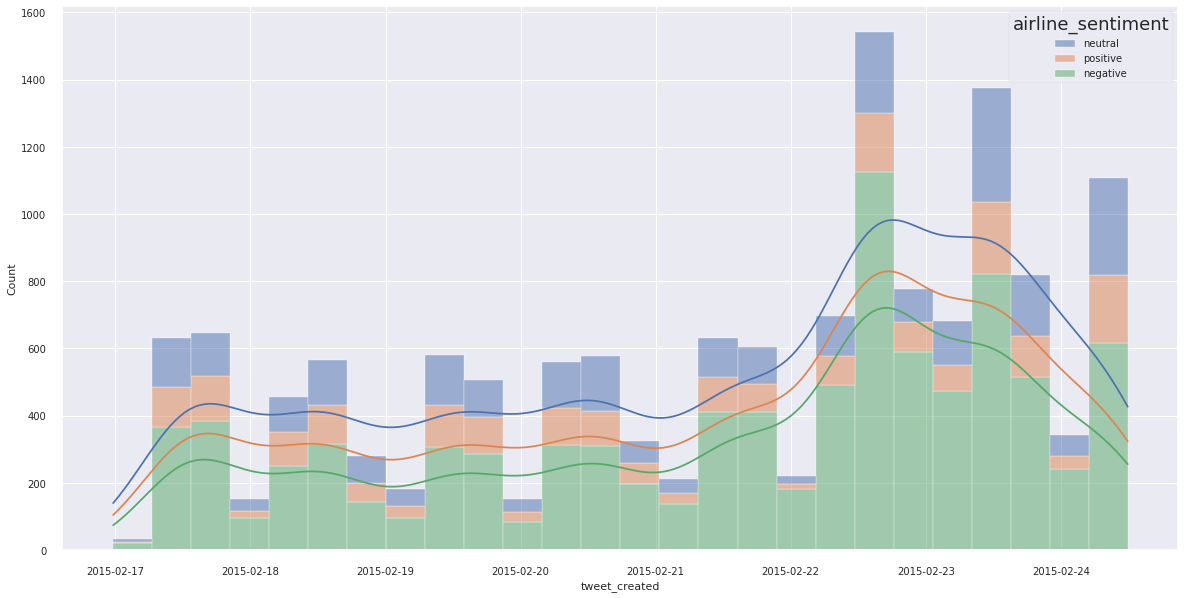

In [26]:
plt.figure(figsize=(20,10))

sns.histplot(data=df_tweets,
            bins="auto",
            x=pd.to_datetime(df_tweets["tweet_created"]),
            hue="airline_sentiment",
            multiple="stack",
            kde=True
            )

plt.show()

In [27]:
datetime(2015,2,23).strftime("%A")
# pd.Timestamp("2015-02-23").weekday_name

'Monday'

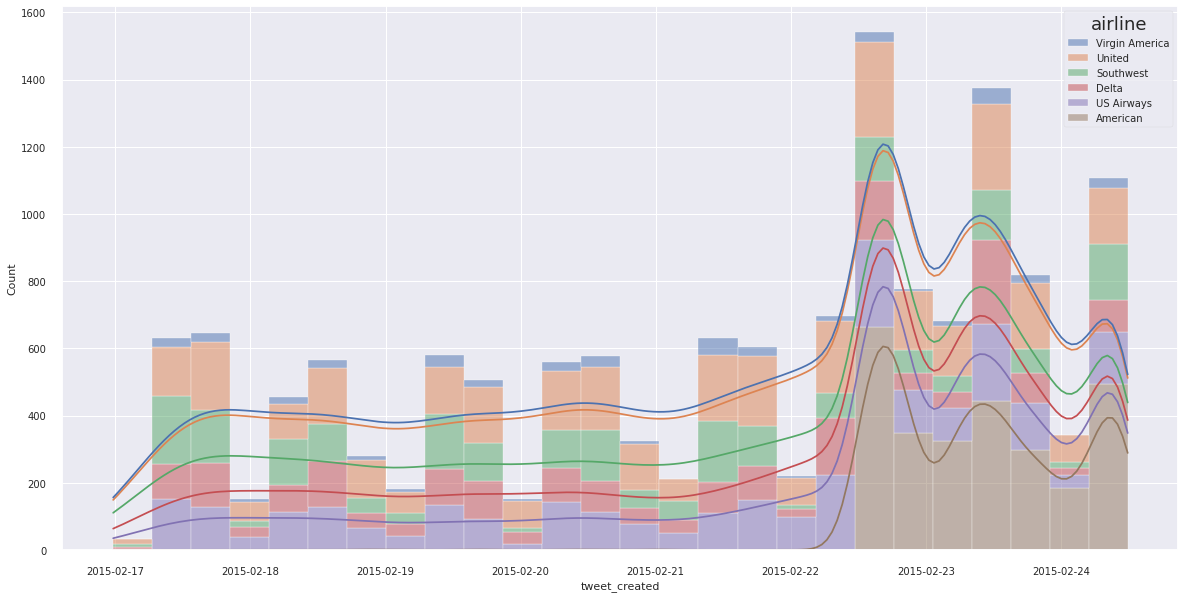

In [28]:
plt.figure(figsize=(20,10))

sns.histplot(data=df_tweets,
            bins="auto",
            x=pd.to_datetime(df_tweets["tweet_created"]),
            hue="airline",
            multiple="stack",
            kde=True
            )

plt.show()

In [29]:
df_tweets["text"].sample(10)

14270                     @AmericanAir @sa_craig no, not helped one bit. actually ended up driving home due to extreme disorganization and lack of communication.
1083                                                                                                                                     @united Definitely will!
10218                      @USAirways sad experience today on 4663.  Family on Southwest direct to MCO. My loyalty to USAir = not vacationing with my boys today.
4198                                                                                                              @united Sure did! Only waited about 15min. Yay!
9378                      @USAirways - Huge props to Parizad at checkin in Sacramento for her help on Friday to get 3 of us home when other airlines were delayed
11542                                                            @USAirways stuck in cae need reFlight Booking Problems for next flight possibly dm for more info
12900    @AmericanAir why ar

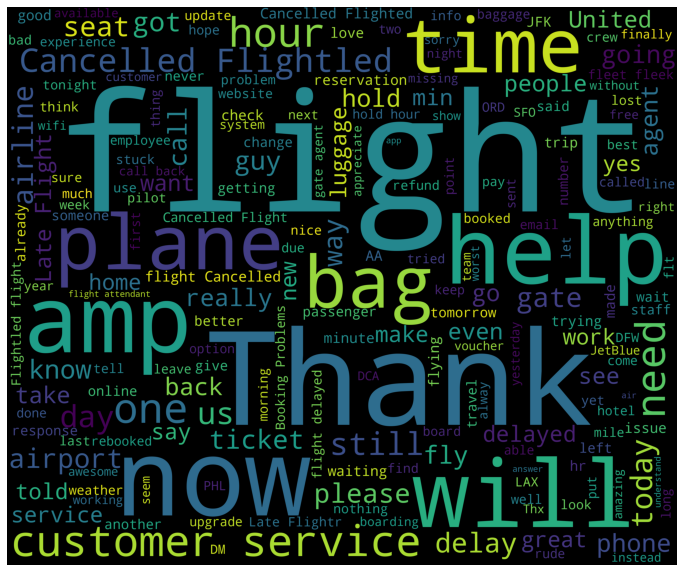

CPU times: user 24.2 s, sys: 382 ms, total: 24.5 s
Wall time: 24.5 s


In [30]:
%%time

words = ' '.join(df_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()                     

In [31]:
df_tweets.loc[df_tweets['airline_sentiment']=='negative']

tweet_id           airline_sentiment  airline_sentiment_confidence  \
3      570301031407624196  negative         1.0000                          
4      570300817074462722  negative         1.0000                          
5      570300767074181121  negative         1.0000                          
15     570282469121007616  negative         0.6842                          
17     570276917301137409  negative         1.0000                          
...                   ...               ...                           ...   
14631  569588464896876545  negative         1.0000                          
14633  569587705937600512  negative         1.0000                          
14634  569587691626622976  negative         0.6684                          
14636  569587371693355008  negative         1.0000                          
14638  569587188687634433  negative         1.0000                          

      negativereason           negativereason_confidence airline          \
3                  Bad Flight 0.7033                      Virgin America   
4                  Can't Tell 1.0000                      Virgin America   
5                  Can't Tell 0.6842                      Virgin America   
15                Late Flight 0.3684                      Virgin America   
17                 Bad Flight 1.0000                      Virgin America   
...                       ...                        ...             ...   
14631              Bad Flight 1.0000                            American   
14633        Cancelled Flight 1.0000                            American   
14634             Late Flight 0.6684                            American   
14636  Customer Service Issue 1.0000                            American   
14638  Customer Service Issue 0.6659                            American   

      airline_sentiment_gold name             negativereason_gold  \
3      NaN                           jnardino  NaN                  
4      NaN                           jnardino  NaN                  
5      NaN                           jnardino  NaN                  
15     NaN                    smartwatermelon  NaN                  
17     NaN                      heatherovieda  NaN                  
...                      ...              ...                 ...   
14631  NaN                           MDDavis7  NaN                  
14633  NaN                    RussellsWriting  NaN                  
14634  NaN                      GolfWithWoody  NaN                  
14636  NaN                           itsropes  NaN                  
14638  NaN                         SraJackson  NaN                  

       retweet_count  \
3      0               
4      0               
5      0               
15     0               
17     0               
...              ...   
14631  0               
14633  0               
14634  0               
14636  0               
14638  0               

      text                                                                                                                                                     \
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
5                    @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA   
15                                                                                                              @VirginAmerica SFO-PDX schedule is still MIA.   
17                  @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!   
...                                                                                  

********************************************************************************
****************************** negative


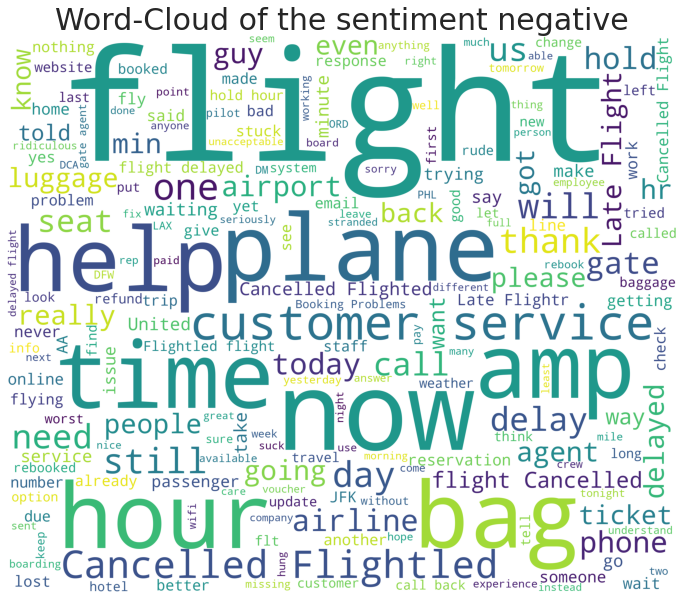

********************************************************************************
****************************** neutral


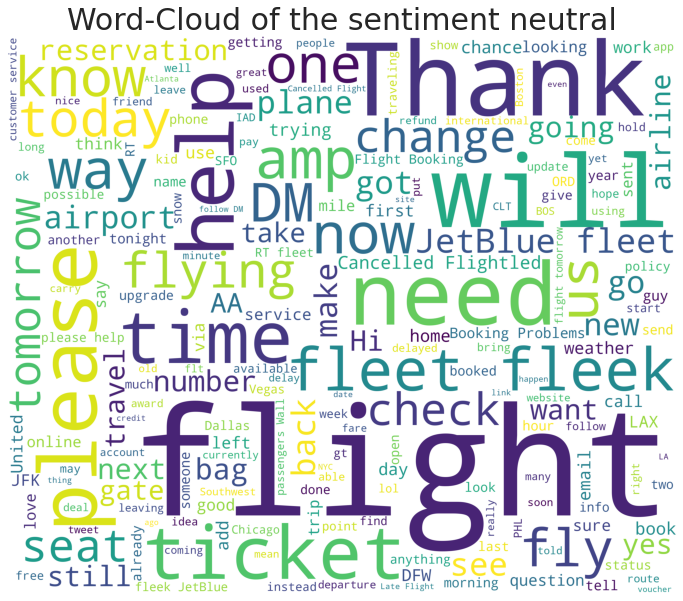

********************************************************************************
****************************** positive


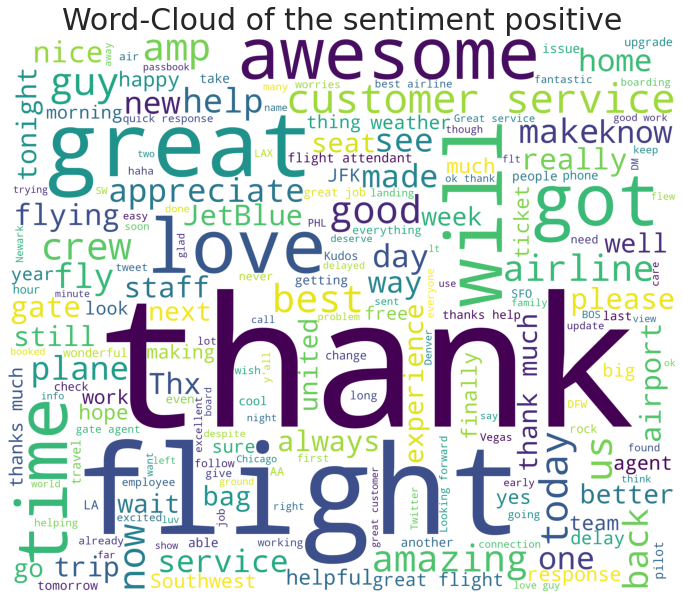

CPU times: user 1min 8s, sys: 1.1 s, total: 1min 9s
Wall time: 1min 9s


In [32]:
%%time
for col_value in list(df_tweets["airline_sentiment"].value_counts().index):
  print("*"*80)
  print("*"*30, col_value)
  words = ' '.join(
      df_tweets.loc[df_tweets['airline_sentiment']==col_value]['text'])
  cleaned_word = " ".join([word for word in words.split()
                              if 'http' not in word
                                  and not word.startswith('@')
                                  and not word.startswith('#')
                              ])
  wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='white',
                        width=3000,
                        height=2500
                      ).generate(cleaned_word)

  plt.figure(1,figsize=(12, 12))
  plt.imshow(wordcloud)
  plt.title("Word-Cloud of the sentiment " + col_value,
            fontsize=30)
  plt.axis('off')
  plt.show()   

============================== United


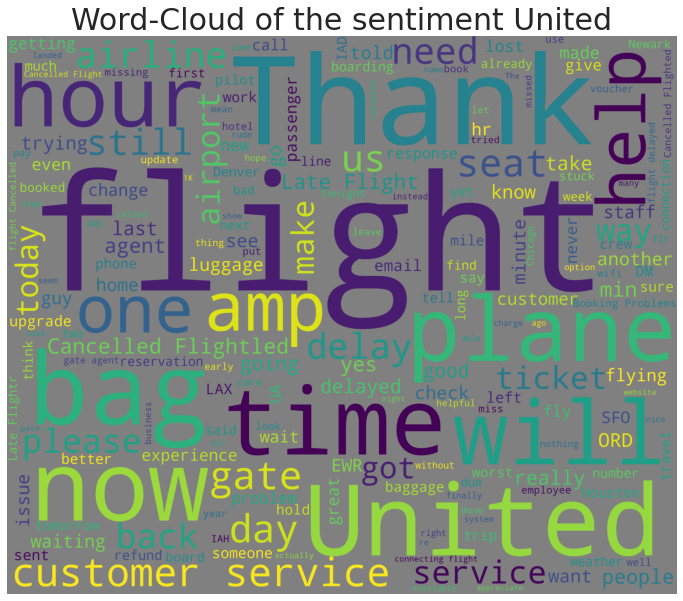

============================== US Airways


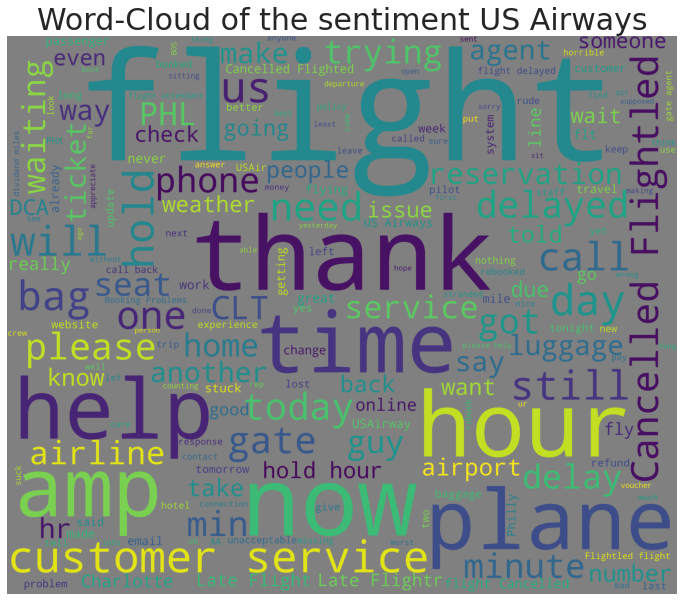

============================== American


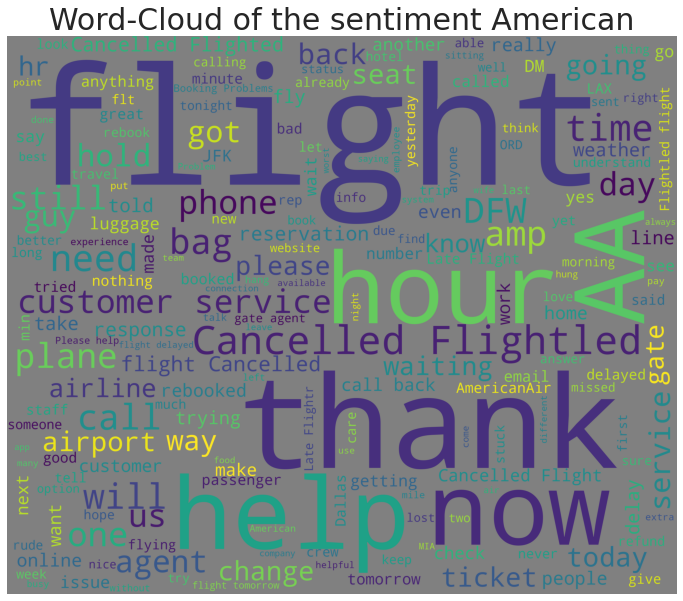

============================== Southwest


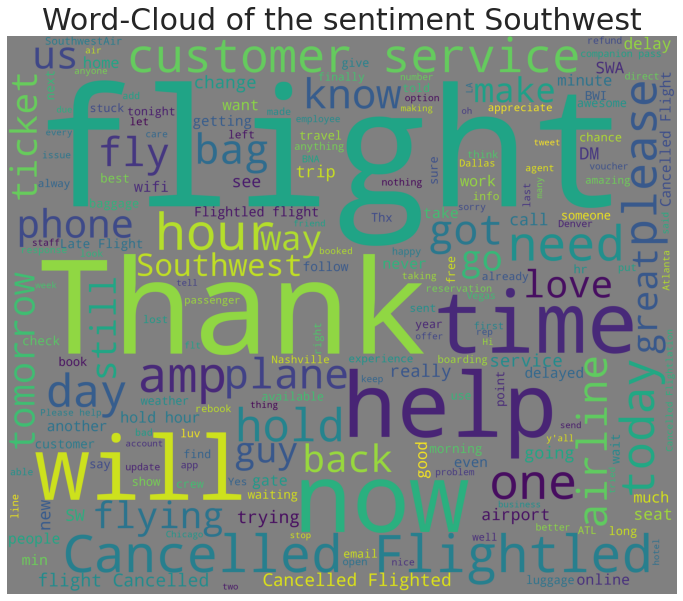

============================== Delta


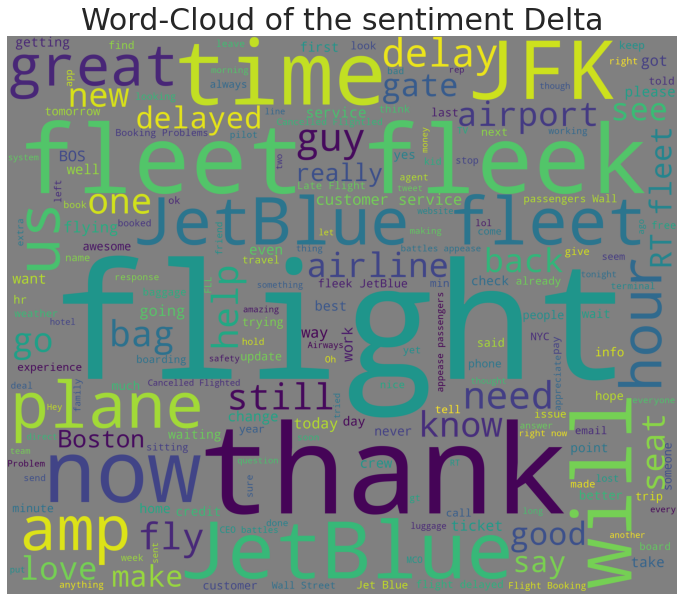

============================== Virgin America


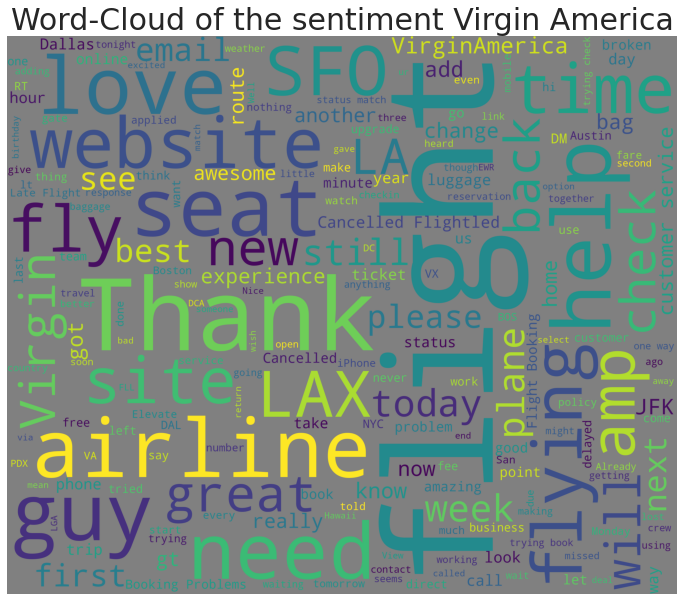

CPU times: user 2min 19s, sys: 2.47 s, total: 2min 22s
Wall time: 2min 21s


In [33]:
%%time
for col_value in list(df_tweets["airline"].value_counts().index):
  print("="*80)
  print("="*30, col_value)
  words = ' '.join(
      df_tweets.loc[df_tweets['airline']==col_value]['text'])
  cleaned_word = " ".join([word for word in words.split()
                              if 'http' not in word
                                  and not word.startswith('@')
                                  and not word.startswith('#')
                              ])
  wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='grey',
                        width=3000,
                        height=2500
                      ).generate(cleaned_word)

  plt.figure(1,figsize=(12, 12))
  plt.title("Word-Cloud of the sentiment " + col_value,
            fontsize=30)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show() 

In [34]:
Categories_hour = df_tweets["tweet_created"].apply(lambda x : pd.Timestamp(x).hour)
Categories_hour

0        11
1        11
2        11
3        11
4        11
         ..
14635    12
14636    11
14637    11
14638    11
14639    11
Name: tweet_created, Length: 14640, dtype: int64

In [35]:
Categories_hour = Categories_hour.value_counts().sort_index(ascending=False)
Categories_hour

23     193
22     292
21     430
20     602
19     675
18     751
17     754
16     734
15     788
14     927
13     900
12     824
11     986
10     962
9     1013
8      926
7      776
6      621
5      477
4      368
3      225
2      174
1      111
0      131
Name: tweet_created, dtype: int64

Text(0.5, 1.0, 'Proportion of tweets for each hour of the day')

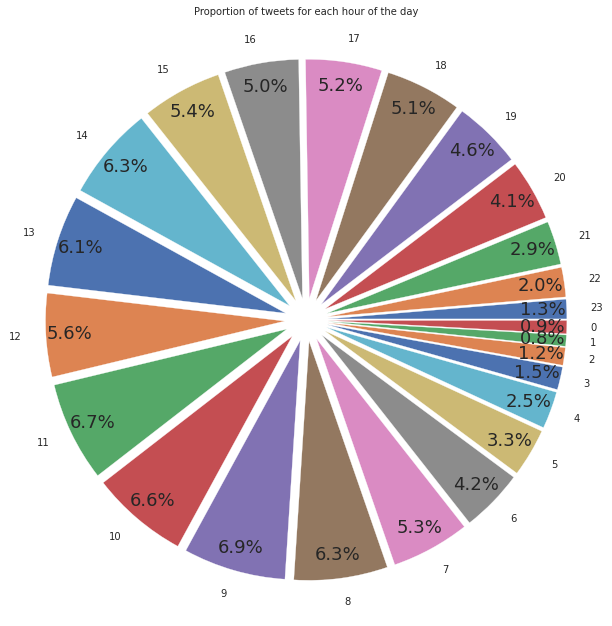

In [36]:
pie, ax = plt.subplots(figsize=[20,11])
# labels = Category.keys()
plt.pie(x=Categories_hour, 
        autopct="%.1f%%", 
        explode=[0.09]*24, 
        labels=Categories_hour.keys(), 
        pctdistance=0.9)
plt.title("Proportion of tweets for each hour of the day", fontsize=10)

In [37]:
df_tweets["word_count"] = [len(t.split()) for t in df_tweets["text"]]
df_tweets["word_count"].describe().T

count   14,640.0000
mean        17.6534
std          6.8823
min          2.0000
25%         12.0000
50%         19.0000
75%         23.0000
max         36.0000
Name: word_count, dtype: float64

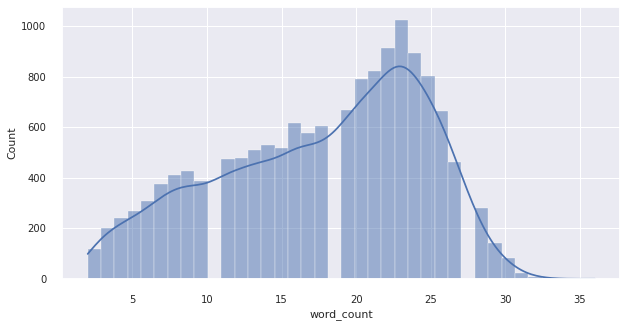

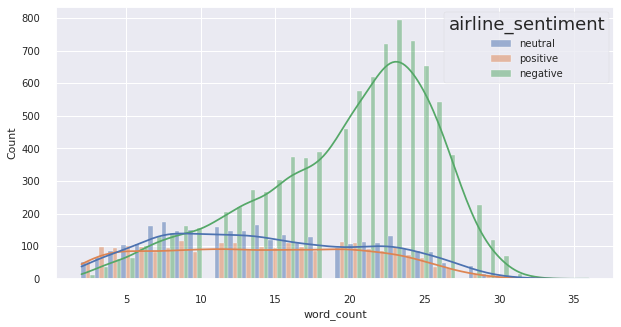

<Figure size 720x360 with 0 Axes>

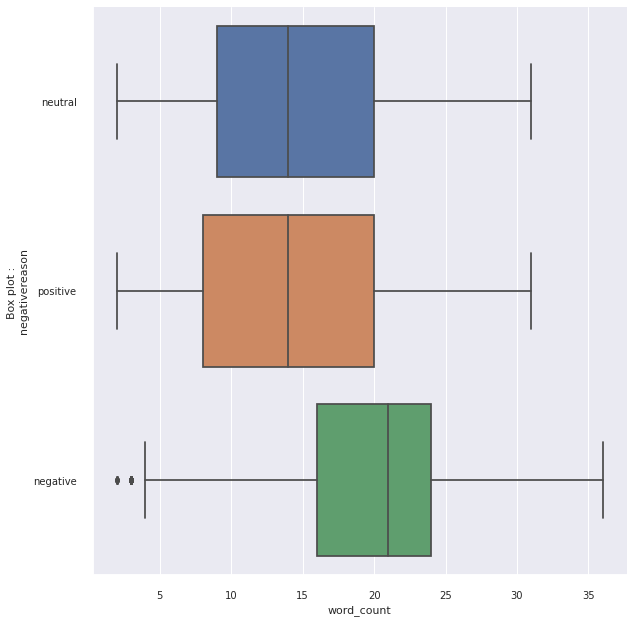

In [38]:
# distribution of data on word_count


plt.figure(figsize=(10,5))
sns.histplot(data=df_tweets,
            #  hue="airline_sentiment",
             x="word_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df_tweets,
             hue="airline_sentiment",
             x="word_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(10,5))
sns.catplot(data=df_tweets, 
            y="airline_sentiment", 
            x="word_count", 
            height=9, 
            kind="box")
plt.ylabel("Box plot : \n" + col)
plt.show()

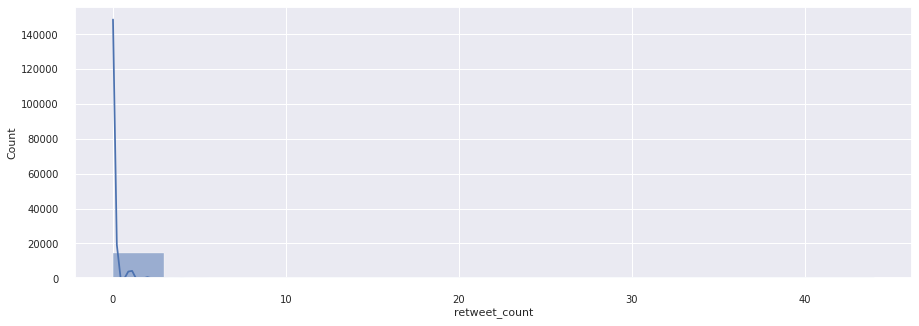

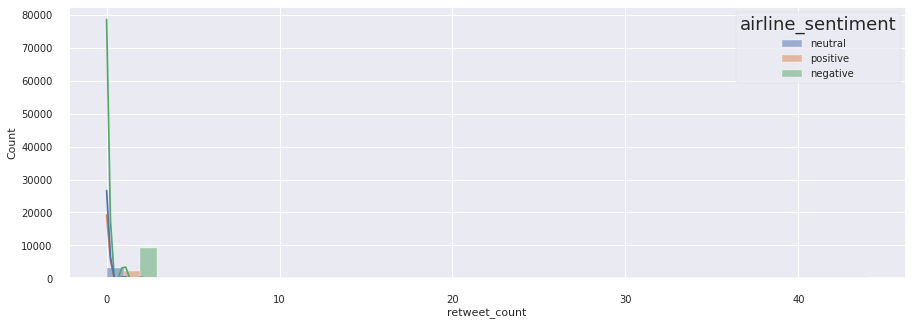

<Figure size 1080x360 with 0 Axes>

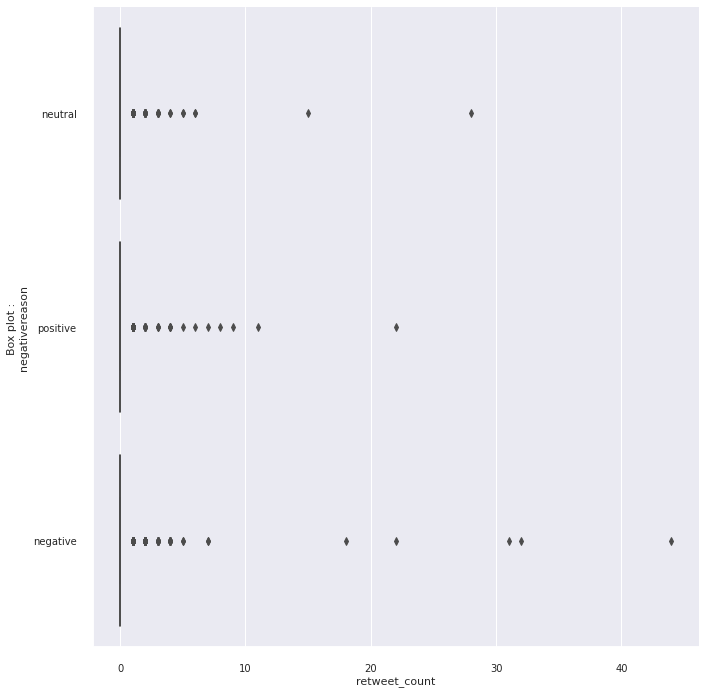

In [39]:
# distribution of data on retweet_count

plt.figure(figsize=(15,5))
sns.histplot(data=df_tweets,
            #  hue="airline_sentiment",
             x="retweet_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(15,5))
sns.histplot(data=df_tweets,
             hue="airline_sentiment",
             x="retweet_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(15,5))
sns.catplot(data=df_tweets, 
            y="airline_sentiment", 
            x="retweet_count", 
            height=10, 
            kind="box")
plt.ylabel("Box plot : \n" + col)
plt.show()

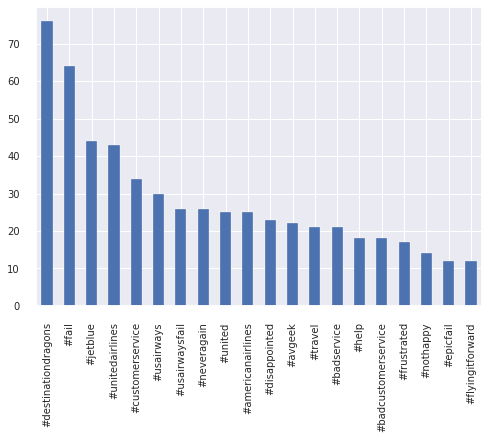

In [40]:
# top 20 occuring hashtags 
words = ' '.join(df_tweets['text'])

list_hashtags = [ x.lower() for x in words.split() if x.startswith("#")\
                    and x not in ["#"]]
pd.Series(list_hashtags, 
          index=None).value_counts(sort=True).head(20).plot(kind="bar")

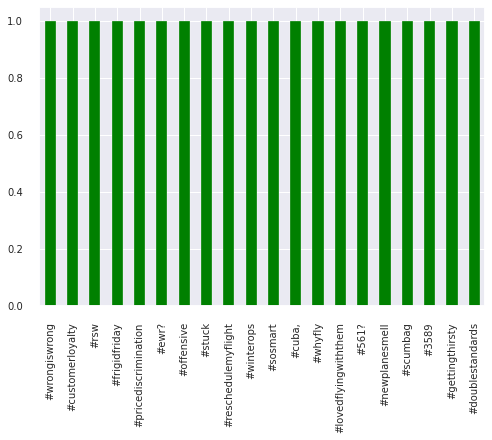

In [41]:
# rare 20 hashtags
pd.Series(list_hashtags, 
          index=None).value_counts(sort=True).tail(20).plot(kind="bar",
                                                            color="Green")

In [42]:
# all hashtags, including repeatitions
str_hashtags = " ".join(list_hashtags)
str_hashtags

'#fabulous #seductive #stress #29daystogo #fail #vx358 #noair #worstflightever #roasted #sfotobos #sendambien #andchexmix #moodlitmonday #sciencebehindtheexperience #moodlitmonday #travelhelp #elevategold #tribute #soundofmusic #oscars2015 #guiltypleasures #carrieunderwood #cmfat35000feet #neverflyvirginforbusiness #inflight #flightattendant #dreampath #neverflyvirgin #change #nomorevirgin #uncomfortable #sfo2lax #sneaky #customerservice #virginamerica #flying #sarcasm #cheapflights #farecompare #cheapflights #farecompare #cheapflights #farecompare #cheapflights #farecompare #phl #pleasecomeback #vabeatsjblue #oscars2015 #likingyoulessandless #oscars #redcarpet #oscars #oscars2015 #frustrated #lame #irmafromdallas #princesshalf #flight #dc #sunset #globe #backtowinter #work! #refreshed #redwineisbetter #emirates #baggageissues #smh #southwestair #flights #disappointed #elevate #gold #worst #flight #americanairlines #disappointed. #expected #beatstheothers #seriously #soreback #diehardv

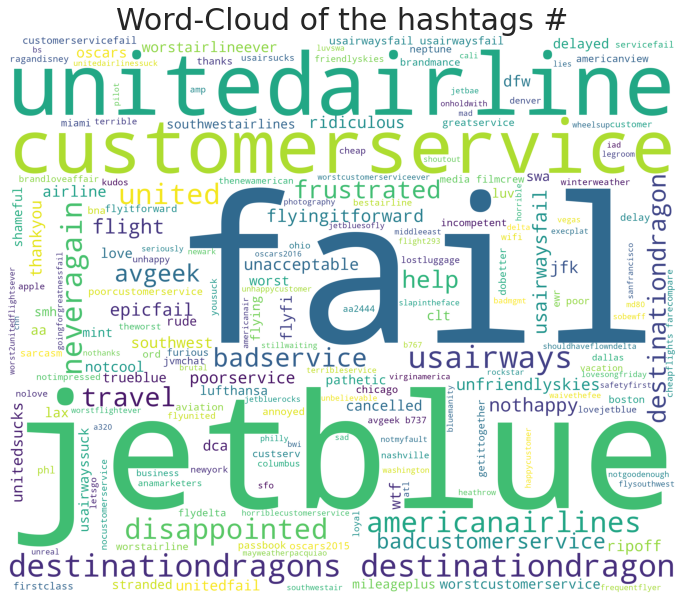

CPU times: user 20.9 s, sys: 339 ms, total: 21.3 s
Wall time: 21.2 s


In [43]:
%%time
wordcloud = WordCloud(
                      background_color='white',
                      width=3000,
                      height=2500
                    ).generate(str_hashtags)

plt.figure(1,figsize=(12, 12))
plt.title("Word-Cloud of the hashtags #",
          fontsize=30)
plt.imshow(wordcloud)
plt.axis('off')
plt.show() 

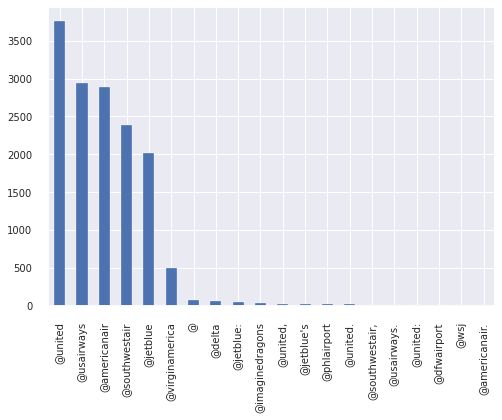

In [44]:
# top 20 occuring mentions  
# words = ' '.join(df_tweets['text'])

list_mentions = [ x.lower() for x in words.split() if x.startswith("@")]
pd.Series(list_mentions, 
          index=None).value_counts(sort=True).head(20).plot(kind="bar")

# 3. Data Pre-Processing

The "text" feature would be used for Sentiment analysis on target variable "airline_sentiment"


From Rubiric,

Each text pre-processing step should be mentioned in the notebook separately. a. Html tag removal. b. Tokenization. c. Remove the numbers. d. Removal of Special Characters and Punctuations. e. Removal of stopwords f. Conversion to lowercase. g. Lemmatize or stemming. h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.) i. Print the first 5 rows of data after pre-processing.

In [45]:
# make a copy of dataset, 
# keeping only relevant features containing information 
df_data = df_tweets[["text","airline_sentiment"]]
df_data

text                                                                                                                                                     \
0                                                                                                                         @VirginAmerica What @dhepburn said.   
1                                                                                    @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                                                     @VirginAmerica I didn't today... Must mean I need to take another trip!   
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
...                                                                                                                                                       ...   
14635                                                                                         @AmericanAir thank you we got on a different flight to Chicago.   
14636  @AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc   
14637                                                                                            @AmericanAir Please bring American Airlines to #BlackBerry10   
14638                 @AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??   
14639              @AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?   

      airline_sentiment  
0       neutral          
1      positive          
2       neutral          
3      negative          
4      negative          
...                 ...  
14635  positive          
14636  negative          
14637   neutral          
14638  negative          
14639   neutral          

[14640 rows x 2 columns]

In [46]:
df_data.sample(20)

text                                                                                                                                                      \
10081                                                        @USAirways flight 1735 sitting fully loaded for over an hour. Air conditioning barely working :-(   
1292              @United "Your bag may or may not be at the airport. Unfortunately, no one at the airport is picking up the phone or responding to messages."   
1040              @united This must be a drone “@united: @KeamBleam We understand your frustration. Our Bag team is working hard to get your bag(s) to you..."   
6817                  @JetBlue it will be glowing. Your crew and your aircraft sparkled. You guys know about @nokidhungry right? Might be a good partnership:)   
4696                                                          @SouthwestAir easy fix, let the business select actually board 1st, then board the pre-boards...   
981                          @United gate announcement states delay due to maintenance yet app says Late Flight arriving aircraft  tell the truth! @unfriendly   
11990                                                                                         @AmericanAir When will the old 777-200 fly ORD-PVG get upgraded?   
12186                                                                                                       @AmericanAir Nice to read it! Thank you very much!   
2699                   @united Marcus helped me - good agent, couldn't fix it. Flight was listed on website, but "unavailable"to book. False advertising much?   
4498                                                                       @SouthwestAir three hour flight to Orlando and no wifi? Uncool. #firstworldproblems   
4841                                                 @SouthwestAir I'm flying out of CUN tomorrow To DEN - can I change my flight due to the travel advisory??   
9435   @USAirways 4 segments, 4/4 delayed. Gnv &gt; CTL . CTL &gt; JAN . JAN &gt; CTL . CTL &gt; GNV. My year off from flying with you guys was the way to go.   
13367           @AmericanAir @USAirways outbound flight: 2 hour delay b/c air traffic &amp; 2 gate changes dividend miles member gets no email or text updates   
9287                                                                               @usairways &amp; @AmericanAir planes in #grandcayman http://t.co/GX7QbtckBr   
13926                                              @AmericanAir delta rerouted 6 of my bags onto aa977 MIA-CUR. How can I see if they made it onto the flight?   
6369                  @SouthwestAir my bag was Late Flight-checked and put on a different flight from OAK-&gt;MSY. Having troubles tracking it down. Any help?   
3014                                                                     @united no because you will charge me or delay me further. United 1612 still waiting.   
8733                                                                                               @Jetblue first airline to use #applepay in flight #airlines   
5604                                                   @SouthwestAir thank you so so much for sending me to LA for #DestinationDragons! Tonight is gonna rock😎   
1562                                                                                                                       @united I was. But I have given up.   

      airline_sentiment  
10081  negative          
1292   negative          
1040   negative          
6817   positive          
4696    neutral          
981    negative          
11990   neutral          
12186  positive          
2699   negative          
4498   negative          
4841    neutral          
9435   negative          
13367  negative          
9287    neutral          
13926  negative          
6369    neutral          
3014   negative          
8733   positive          
5604   positive          
1562   negative

### Observation by Sanjib:

Following pre-processing of text are required:


1. Replace contractions in string (e.g. replace "I'm" with "I am")

2. Remove : (They do not contribute to sentiments)

  2.1 Remove HTML Tags.
  
  2.2 Remove numbers.

  2.3 Remove tags starting with '@', '$'. 
  
  (Note: Some hashtags starting with '#' contains sentiments, as we observed during EDA)

  2.4 Removal of URL’s.

  2.5 Removal of Punctuations.
  

3. Replacement:

  3.1 Replace the emoji with words, which are meaningful to sentiment. Examples, 👎	
   
  3.2 Replace emojicons (e.g. :>, :-< ) with meaningful words>  
  
4. Removal of non-ASCII characters.
    
5. Conversion of all characters to lowercase.

6. Tokenize text. Remove Stopwords. Before removing shortlist the stopwords that are meaningful to determine sentiment.

7. Spelling Correction. (Note: Tweets have usually spelling mistakes)

8. Lemmatize text. (preffered over stemming)



## 3.1 Toeknization

Followed by WordCloud Visualization

In [47]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [48]:
nltk.word_tokenize(
    "I've tried both desktop and mobile, :-() http://t.co/AvyqdMpi1Y.	negative 😭😭	")

# df_clean_tweet['clean_text'] = df_clean_tweet.apply(lambda row: nltk.word_tokenize(row['clean_text']), 
#                                                  axis=1) # Tokenization of data
# df_clean_tweet                                                 

['I',
 "'ve",
 'tried',
 'both',
 'desktop',
 'and',
 'mobile',
 ',',
 ':',
 '-',
 '(',
 ')',
 'http',
 ':',
 '//t.co/AvyqdMpi1Y',
 '.',
 'negative',
 '😭😭']

### Observation by Sanjib:

  1. The tokenization breaks an URL. Entire URL needs to be removed, because URL contains no information regarding sentiment classification.

  For the time being, we'll proceed with normalization only, as follows.



## 3.2 Normalization

In [49]:
%%time

# Spelling Correction: unit testing the libray with one smaple, 
str(TextBlob(
"I'll book my next Christmas vacatinn this Deceber any other ways you want to devalue mileage plus."
).correct())


CPU times: user 399 ms, sys: 2.05 ms, total: 401 ms
Wall time: 400 ms


"I'll book my next Christmas vacation this December any other ways you want to value mileage plus."

###Observation by Sanjib:

  1. The spelling check operation comsumes significant time. This needs to be performed after words are removed.

In [50]:
# emoji
%%time
# import emoji
emoji.demojize("united :-( customer service 👎", delimiters=("",""))

CPU times: user 69.5 ms, sys: 966 µs, total: 70.4 ms
Wall time: 69.8 ms


'united :-( customer service thumbs_down'

In [51]:
%%time 
text = "@United I am delighted ✈️ 😃 👍"
print (emoji.demojize( text,  delimiters=("","")) )

@United I am delighted airplane grinning_face_with_big_eyes thumbs_up
CPU times: user 396 µs, sys: 21 µs, total: 417 µs
Wall time: 424 µs


In [52]:
%%time
def replace_emojicons(str_p : str):
    """
      Desc: Replace following emoticons with meaningful
            words - happy, disgusting, surprise  
      Params:
        str_p : str = string where to replace
      Returns:
        str = string after replace
    """    
    # start_time = datetime.now()

    ##
    for ch in [":)", ":):)", ":-)", ":-))", ":-3", ":3"
               ":-{)", ":-):-)", ":-]", ":->", ":>", "8)",
               "8-)", ":-}", ":}", ":o)", "=3", "B^D", 
               ":c)", "c:", ":c)" "C:", ":^)", "=]", "=)",
               ";D", ";>", ";)", ";-)", ";]", ";-]", ";>",
               "O:-)", "O:)", "0:-3", "0:)", "0:-)", "0:)",
               "(^_^)/", "(^O^)／", "(＾ｖ＾)", ";p"]:
      if ch in str_p:
        str_p = str_p.replace(ch, " happy " )

        

    ##
    for ch in [":(", ":(:(", ":-(", ":-c", ":c", ":-<", 
               ":<", ":-[", ":[", ":-[", ":-||", ">:[",  
               ":-{(", ":-(:-(", ":{", ":@", ";(", ":'(",
               ":'-(", ":=(", "D-'", "D:<", "D:", "D8",
               "D;", "D=", "DX", ":S", ":-/", ":/", ">:\\",
               ">:/", ":L", "8====D", "</3", "<\3", "8-X",
               "8=X", "x-3", "x=3"]:
      if ch in str_p:
        str_p = str_p.replace(ch, " disgusting " )

    ##
    for ch in [":O", ":-O", ":o", ":-o", "8-0", ">:O",
               ":0", ":-0", "(@_@)", "(*_*)"]:
      if ch in str_p:
        str_p = str_p.replace(ch, " surprise " )

    # print("replace_emojicons() duration {}".format(
    # datetime.now() - start_time))      

    return str_p


 # unit testing 
replace_emojicons("united :-( customer service 👎")


CPU times: user 21 µs, sys: 1e+03 ns, total: 22 µs
Wall time: 25.5 µs


In [53]:
nltk.download('stopwords')
nltk.download('wordnet')

stopwords = stopwords.words('english')
stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [54]:
%%time

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', 
              "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
              'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', 
              "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', 
              "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', 
              "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, 
# so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist)) 
stopwords.append("w/")     

lemmatizer = WordNetLemmatizer()



############################################
def lemmatize_list(words):
    """Lemmatize"""
    # start_time = datetime.now()   
    # new_words = []
    # for word in words.split():
    #   new_words.append(" ")
    #   new_words.append(lemmatizer.lemmatize(word, pos='v'))

    new_words = [lemmatizer.lemmatize(word, 
                      pos='v') for word in words.split()]
 
    # print("lemmatize_list() duration = {}".format(
    #   datetime.now() - start_time))     
    return " ".join(new_words)

# Examples : Unit testing
text = "Couldn't make changes online and after 90 mins on hold and time" +\
" dealing w/ the rude rep, the 24 hour window has closed."
print("Testing lemmatize_list :" ,
      lemmatize_list(text) )



Testing lemmatize_list : Couldn't make change online and after 90 mins on hold and time deal w/ the rude rep, the 24 hour window have closed.
CPU times: user 1.56 s, sys: 74 ms, total: 1.64 s
Wall time: 1.6 s


In [55]:
%%time

# Examples : Unit testing
text = "@united I had one interview I was the last person what does that mean?"
print("Testing lemmatize_list :" ,
      lemmatize_list(text) )

Testing lemmatize_list : @united I have one interview I be the last person what do that mean?
CPU times: user 216 µs, sys: 0 ns, total: 216 µs
Wall time: 167 µs


In [56]:
%%time 
text = "united :-( customer service 👎. I am disappointed"
unicodedata.normalize('NFKD', text).encode('ascii', 
          'ignore').decode('utf-8', 'ignore')

CPU times: user 11 µs, sys: 1e+03 ns, total: 12 µs
Wall time: 15.3 µs


In [57]:
%%time

############################################
def strip_html(text):
    # start_time = datetime.now()
    soup = BeautifulSoup(text, "html.parser")  
    # print("remove_numbers duration {}".format(
    # datetime.now() - start_time))                  
    return soup.get_text()

# Examples : Unit testing
text = "<h1>This is my website</h1>"
print("Testing strip_html :" ,
      strip_html(text) )


Testing strip_html : This is my website
CPU times: user 281 µs, sys: 0 ns, total: 281 µs
Wall time: 284 µs


In [58]:
%%time

# Examples : Unit testing
text = "<h1>This is my website</h1><h2>Details here</h2>"
print("Testing strip_html :" ,
      strip_html(text) )


Testing strip_html : This is my websiteDetails here
CPU times: user 873 µs, sys: 0 ns, total: 873 µs
Wall time: 771 µs


In [59]:


############################################

def remove_numbers(text):
  #remove the numericals present in the text
  # start_time = datetime.now()
  text = re.sub(r'\d+', '', text)
  # print("remove_numbers duration {}".format(
  #     datetime.now() - start_time))
  return text

# Examples : Unit testing
text = "@united A change fee of $200. Same exact flight from ATL-HOU is " +\
"$165. Why a charge of $574? The math doesn't add up."
print("Testing remove_numbers :" ,remove_numbers(text) )

############################################
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    # start_time = datetime.now()

    new_words = unicodedata.normalize('NFKD', 
                      words).encode('ascii', 
                                  'ignore').decode('utf-8', 'ignore')
    # print("remove_non_ascii() duration = {}".format(
    # datetime.now() - start_time))  
    return new_words

# Examples : Unit testing
text = "united :-( customer service 👎"
print("Testing remove_non_ascii() :" ,
      remove_non_ascii(text) )

############################################
# def to_lowercase(words):
#     """Convert all characters to lowercase from list of tokenized words"""
#     new_words = []
#     for word in words.split():
#         new_words.append(" ")
#         new_word = word.lower()
#         new_words.append(new_word)
#     return "".join(new_words)

    
# # Examples : Unit testing
# text = "Flight Crew Availability is to blame? NEVER AGAIN with @United."
# print("Testing to_lowercase :" ,
#       to_lowercase(text) )

############################################
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    # start_time = datetime.now()
    new_words = []
    # for word in words.split():
        # as tweets may not have whitespace along with punctuations always,
        # we are going to add whitespace in place of punctuations 
    new_words = re.sub(r'[^\w\s]', ' ', words)
        # if new_word != ' ':
        #     new_words.append(" ")
        #     new_words.append(new_word)
    # print("remove_punctuation() duration = {}".format(
    # datetime.now() - start_time)) 
    return new_words

# Examples : Unit testing
text = "@united WTF!?!? Delay after delay. 15 hours YVR to SAN? Unacceptable."
print("Testing remove_punctuation() :" ,
      "".join(remove_punctuation(text)) )    

############################################
def remove_stopwords_lower(words):
    """Remove stop words from list of tokenized words"""
    # start_time = datetime.now()

    # new_words = []
    # for word in words.split():
    #     if word not in stopwords:
    #         new_words.append(" ")
    #         new_words.append(word)
    new_words = [word.lower() for word in words.split() \
                    if word not in stopwords]

    # print("remove_stopwords() duration = {}".format(
    # datetime.now() - start_time))         
    return " ".join(new_words)

# Examples : Unit testing
text = "Flight Crew Availability is to blame? NEVER AGAIN with @United."
print("Testing remove_stopwords_lower :" ,
      "".join(remove_stopwords_lower(text)) )



############################################
# # Function for url's
# def remove_urls(text):
#     # url_pattern = re.compile(r'https?://\S+|www\.\S+')
#     # return url_pattern.sub(r'', text)
#     start_time = datetime.now()
#     text = re.sub(
#     'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',
#     '',text)
#     print("remove_urls() duration = {}".format(
#       datetime.now() - start_time))
#     return text

# # Examples : Unit testing
# text = "This is my website. Website is https://to.abc.com"
# print("Testing remove_urls() :" ,remove_urls(text) )


############################################

#expand the contractions

# def replace_contractions(text):
#     """Replace contractions in string of text"""
#     return contractions.fix(text)

# Examples : Unit testing
text = "Couldn't make changes online"
print("Testing replace_contractions :" ,
      contractions.fix(text) )


Testing remove_numbers : @united A change fee of $. Same exact flight from ATL-HOU is $. Why a charge of $? The math doesn't add up.
Testing remove_non_ascii() : united :-( customer service 
Testing remove_punctuation() :  united WTF     Delay after delay  15 hours YVR to SAN  Unacceptable 
Testing remove_stopwords_lower : flight crew availability blame? never again @united.
Testing replace_contractions : could not make changes online


In [60]:
%%time
############################################


def remove_mention_number_dollar_url(text_p : str):
    """
      Description: 
        remove the followings in the tweets
        mention, decimal, integer, dollar-currency, 
        URL, punctuation
    """
    # start_time = datetime.now()

    text_p = re.sub(
    r'@\w+|\d+(\.\d*)?|\$|http[s]?://(?:' +\
    '[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'+\
    '' #'|[^\w\s]' # removing punctuation removed emoji
    ,
    '',text_p)

    # print(
    # "remove_mention_number_dollar_url_punctuation() duration = {}".format(
    #   datetime.now() - start_time))
    return text_p

# Examples : Unit testing
text = "@AmericanAir Please bring American Airlines to #BlackBerry10," +\
" at $0.0. Website is https://to.abc.com @AmericanAir.  😭😭	"
# print(text)
print("Testing remove_mention_number_dollar_url() :", 
      remove_mention_number_dollar_url(text) )

Testing remove_mention_number_dollar_url() :  Please bring American Airlines to #BlackBerry, at . Website is  .  😭😭	
CPU times: user 646 µs, sys: 0 ns, total: 646 µs
Wall time: 581 µs


In [61]:
%%time
# Examples : Unit testing
text = "@AmericanAir Please bring American Airlines to #BlackBerry10," +\
" at $0.0. Website is https://to.abc.com @AmericanAir.  😭😭	"
# print(text)
print("Testing remove_mention_number_dollar_url() :", 
      remove_mention_number_dollar_url(text) )

Testing remove_mention_number_dollar_url() :  Please bring American Airlines to #BlackBerry, at . Website is  .  😭😭	
CPU times: user 306 µs, sys: 0 ns, total: 306 µs
Wall time: 241 µs


In [62]:
%%time
"Here are ABC.".lower()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs


'here are abc.'

In [63]:
re.sub('[^\w\s]','',"thumbs_up") 

'thumbs_up'

In [64]:
%%time

############################################
def normalize(words):
    """
      Desc: 
        Wrapper function of all text pre-processing
      Params:
        words : str 
      Return:
        str = Cleaned Text  
    """

    """


    1. Replace contractions in string (e.g. replace "I'm" with "I am")

    2. Remove : (They do not contribute to sentiments)

      2.1 Remove HTML Tags.
      
      2.2 Remove numbers.

      2.3 Remove tags starting with '@', '$'. 
      
      (Note: Some hashtags starting with '#' contains sentiments, as we observed during EDA)

      2.4 Removal of URL’s.

      2.5 Removal of Punctuation.
      

    3. Replacement:

      3.1 Spelling Correction. (Note: Tweets have )

      3.3 Replace the emoji with words, which are meaningful to sentiment. Examples, 👎	
      
      3.4 Replace emojicons (e.g. :>, :-< ) with meaningful words>  

      
    4. Removal of non-ASCII characters.
        
    5. Conversion of all characters to lowercase.

    6. Tokenize text. Remove Stopwords. Before removing,
    please shortlist the stopwords that are meaningful to determine sentiment.

    7. Lemmatize text. (preffered over stemming)


    """

    # strip_html



    words = remove_mention_number_dollar_url(words)
    
    # print(words)
    


    words = contractions.fix(words)
    # print(words)
    
    words = remove_stopwords_lower(words)
    # print(words)

    # words = remove_punctuation(words)
    # print(words)
    # words = remove_non_ascii(words)
    # words = unicodedata.normalize('NFKD', words
    #       ).encode('ascii', 
    #       'ignore').decode('utf-8', 'ignore')

    # words = to_lowercase(words)
    # words = words.lower()


    words = emoji.demojize(words, delimiters=(" "," "))
    words = replace_emojicons(words)
    # print(words)

    #remove punctuations
    words = re.sub('[^\w\s]','',words) 

    # The spelling correction took long processing time
    # words = str(TextBlob(words).correct())

    words = lemmatize_list(words)
    return words

#Unit testing
print(normalize(
"I've tried both desktop and mobile, :-() http://t.co/AvyqdMpi1Y.	negative 😭😭	"))

i try desktop mobile disgust negative loudly_crying_face loudly_crying_face
CPU times: user 724 µs, sys: 0 ns, total: 724 µs
Wall time: 661 µs


In [65]:
%%time 
#Unit testing
print(normalize(
"I've tried both desktop and mobile, :( http://t.co/AvyqdMpi1Y	negative 😭😭	"))

i try desktop mobile disgust negative loudly_crying_face loudly_crying_face
CPU times: user 677 µs, sys: 0 ns, total: 677 µs
Wall time: 660 µs


In [66]:
%%time 

df_data["clean_text"] = df_data.apply(lambda row: normalize(row["text"]),
                                      axis=1)
df_data

CPU times: user 7.55 s, sys: 34.2 ms, total: 7.59 s
Wall time: 7.56 s


In [67]:
# %%time
# np.vectorize(normalize)(df_data["text"])

In [68]:
# save to disk
df_data.to_csv("/content/drive/MyDrive/Colab Notebooks/tweet-clean.csv",index=True)

In [69]:
df_data.sample(20)

text                                                                                                                                                               \
12662                      @AmericanAir doesn't care about customers, break your gear and tell u they can't do anything. @WSJ @latimes @chicagotribune #media #filmcrew   
8361                                                                                                                            @JetBlue Thanks! I just sent a few DMs.   
13417                                                                                                    @AmericanAir how comes no one has answered my calls or emails?   
10915  @USAirways thanks for helping with #reFlight Booking Problems #Cancelled Flightedflight Yvonne Anthony.  You will help us get to Tel Aviv on time.  #HappyFriday   
6553                                         @SouthwestAir my flight was Cancelled Flightled Monday.  Just looking to Cancelled Flight and credit my card.  That's all.   
10216                                              @USAirways @AmericanAir  stranded in North Carolina and trying to figure out options but can't get anyone to talk to   
11775                      @USAirways unfortunately not. I think I watched it take off from the bus. Rebooked for a Late Flightr flight now #planestrainsandautomobiles   
1709                                                                               @united Lied to my face at the gate about upgrades. Thanks. #badservice #unitedsucks   
9931                                     @USAirways Do you have Bereavement discount on airfare as my grandfather just passed and need to attend his funeral this week.   
1766                                                                             @united trying to check in for tomorrow's flight. website keeps timing out. what's up?   
3256                                                        @united thanks for the reply. I have been in contact with Customer Care to get clarification on this issue.   
7977                                                                                                                                 @JetBlue imma need the hook up tho   
9411                       @USAirways US 728. Nope, not getting off. 3 hours in the plane. 4 pilot announcements. One water run of the planet's smallest water bottles.   
7890                                                                                                                                               @JetBlue word thanks   
11043                              @USAIRWAYS ARE YOU KIDDING ME?? Bad customer service, folks. Flew from PSP to PHX flight 2692 on 2/19. (cont) http://t.co/KigfKVXxDQ   
5723                       @SouthwestAir sure did. Also read on there that Southwest doesn't believe it is liable for the incident. How is it my fault that SW lost it?   
3619                                                  @united sprinted from C concourse to E and just made it. Coughed up a lung in the process but am now in CLT! Tnx!   
3870                   @united -today the staff @ MSP took customer service to a new level. My father passed away last night &amp; you helped me get home today! Thanks   
2977                                                                       @united crew has been notified, passenger moved but water not fixed. Now on tarmac two hours   
6648                   @SouthwestAir thank you, someone finally answered and was able to change my flight that was Cancelled Flighted bc of ice. Thank you for response   

      airline_sentiment  \
12662  negative           
8361    neutral           
13417  negative           
10915  positive           
6553   negative           
10216  negative           
11775   neutral           
1709   negative           
9931    neutral           
1766   negative           
3256   positive           
7977    neutral           
9411   negative           
7890   positive           
11043  ne

In [70]:
df_clean_tweet = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tweet-clean.csv")

In [71]:
df_clean_tweet

Unnamed: 0  \
0          0        
1          1        
2          2        
3          3        
4          4        
...           ...   
14635  14635        
14636  14636        
14637  14637        
14638  14638        
14639  14639        

      text                                                                                                                                                     \
0                                                                                                                         @VirginAmerica What @dhepburn said.   
1                                                                                    @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                                                     @VirginAmerica I didn't today... Must mean I need to take another trip!   
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
...                                                                                                                                                       ...   
14635                                                                                         @AmericanAir thank you we got on a different flight to Chicago.   
14636  @AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc   
14637                                                                                            @AmericanAir Please bring American Airlines to #BlackBerry10   
14638                 @AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??   
14639              @AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?   

      airline_sentiment  \
0       neutral           
1      positive           
2       neutral           
3      negative           
4      negative           
...                 ...   
14635  positive           
14636  negative           
14637   neutral           
14638  negative           
14639   neutral           

      clean_text                                                                                     
0                                                                                          what say  
1                                                             plus add commercials experience tacky  
2                                                    i not today must mean i need take another trip  
3                   really aggressive blast obnoxious entertainment guests face amp little recourse  
4                                                                              really big bad thing  
...                                                                                             ...  
14635                                                            thank get different flight chicago  
14636  leave minutes late flight no warn communication minutes late flight call shitty customer svc  
14637                                                     please bring american airlines blackberry  
14638                        money change flight not answer phone any suggestions i make commitment  
14639                     ppl need know many seat next flight plz put us standby people next flight  

[14640 rows x 4 columns]

# 4. Feature Enggineering - Basic




## 4.1 Features of CountVectorizer 

In [72]:
# bow_vec1 = CountVectorizer()  
# data_features1 = bow_vec1.fit_transform(
#     df_clean_tweet['clean_text'])

# data_features1 = data_features1.toarray()                        # Convert the data features to array.
# data_features1.shape

In [73]:
# Keep only 2000 features as number of features will increase the processing time.
bow_vec = CountVectorizer(max_features=2000)                
data_features = bow_vec.fit_transform(
    df_clean_tweet['clean_text'].values.astype('U'))

data_features = data_features.toarray()  
data_features       

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [74]:
data_features.shape

(14640, 2000)

In [75]:
# summarize
print(bow_vec.vocabulary_)

{'what': 1924, 'say': 1527, 'plus': 1321, 'add': 24, 'experience': 620, 'not': 1174, 'today': 1776, 'must': 1135, 'mean': 1068, 'need': 1148, 'take': 1707, 'another': 90, 'trip': 1806, 'really': 1411, 'entertainment': 583, 'face': 634, 'amp': 81, 'little': 1005, 'big': 212, 'bad': 166, 'thing': 1744, 'seriously': 1552, 'would': 1968, 'pay': 1272, 'flight': 687, 'seat': 1536, 'play': 1316, 'fly': 703, 'va': 1870, 'yes': 1984, 'nearly': 1147, 'every': 600, 'time': 1769, 'vx': 1889, 'go': 765, 'away': 159, 'happy': 794, 'miss': 1109, 'opportunity': 1219, 'without': 1953, 'hat': 798, 'there': 1741, 'well': 1921, 'now': 1183, 'do': 528, 'amaze': 75, 'arrive': 119, 'hour': 841, 'early': 554, 'good': 769, 'me': 1065, 'know': 955, 'second': 1538, 'lead': 978, 'death': 462, 'among': 79, 'teens': 1720, 'lt': 1034, 'pretty': 1351, 'much': 1132, 'better': 208, 'this': 1748, 'great': 772, 'deal': 460, 'already': 69, 'think': 1746, 'nd': 1144, 'even': 596, 'st': 1645, 'yet': 1986, 'fabulous': 633, '

### Observation by Sanjib:

1. Apparaently the selected features do not have spelling mistakes.




## 4.2 Features of TF-IDF Vectorizer

In [76]:
# create the transform
tf_idf_vectorizer = TfidfVectorizer(max_features=2000)
# tokenize and build vocab
data_features_tf_idf = tf_idf_vectorizer.fit_transform(
    df_clean_tweet['clean_text'].values.astype('U'))

data_features_tf_idf = data_features_tf_idf.toarray()

data_features_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
# summarize
data_features_tf_idf.shape

(14640, 2000)

In [78]:
# summarize
print(tf_idf_vectorizer.vocabulary_)
print(tf_idf_vectorizer.idf_)

{'what': 1924, 'say': 1527, 'plus': 1321, 'add': 24, 'experience': 620, 'not': 1174, 'today': 1776, 'must': 1135, 'mean': 1068, 'need': 1148, 'take': 1707, 'another': 90, 'trip': 1806, 'really': 1411, 'entertainment': 583, 'face': 634, 'amp': 81, 'little': 1005, 'big': 212, 'bad': 166, 'thing': 1744, 'seriously': 1552, 'would': 1968, 'pay': 1272, 'flight': 687, 'seat': 1536, 'play': 1316, 'fly': 703, 'va': 1870, 'yes': 1984, 'nearly': 1147, 'every': 600, 'time': 1769, 'vx': 1889, 'go': 765, 'away': 159, 'happy': 794, 'miss': 1109, 'opportunity': 1219, 'without': 1953, 'hat': 798, 'there': 1741, 'well': 1921, 'now': 1183, 'do': 528, 'amaze': 75, 'arrive': 119, 'hour': 841, 'early': 554, 'good': 769, 'me': 1065, 'know': 955, 'second': 1538, 'lead': 978, 'death': 462, 'among': 79, 'teens': 1720, 'lt': 1034, 'pretty': 1351, 'much': 1132, 'better': 208, 'this': 1748, 'great': 772, 'deal': 460, 'already': 69, 'think': 1746, 'nd': 1144, 'even': 596, 'st': 1645, 'yet': 1986, 'fabulous': 633, '

# 5. Data Split

Spilt the dataset into -

train :: test = 80 :: 20

Assumption : The cross-validation would be part of the algorithm  

In [79]:
# To achieve consistency
seed_value = 7

np.random.seed(seed_value)
tf.random.set_seed(seed_value)

y=df_clean_tweet["airline_sentiment"] 
y.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [80]:
# Encode classes into numbers
y = y.replace({"negative": 0, 
               "neutral": 1, 
               "positive": 2}).astype("uint8")
y

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: uint8

## 5.1 TF-IDF Features

In [81]:
%%time

# Split dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    pd.DataFrame( data_features_tf_idf, 
                 index=df_clean_tweet.index,
                 dtype="float16"), 
    y, 
    test_size=0.20, 
    random_state=10,
    stratify=y)


print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (11712, 2000)
X_test (2928, 2000)
y_train (11712,)
y_test (2928,)
CPU times: user 173 ms, sys: 34.1 ms, total: 207 ms
Wall time: 205 ms


In [82]:
# check if the distribution of target classes are preserved after dataset split

print(y.value_counts(normalize=True))
print("="*40)
print(y_train.value_counts(normalize=True))
print("="*40)
print(y_test.value_counts(normalize=True))
print("="*40)

0   0.6269
1   0.2117
2   0.1614
Name: airline_sentiment, dtype: float64
0   0.6269
1   0.2117
2   0.1615
Name: airline_sentiment, dtype: float64
0   0.6270
1   0.2117
2   0.1612
Name: airline_sentiment, dtype: float64


In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11712 entries, 13285 to 5361
Columns: 2000 entries, 0 to 1999
dtypes: float16(2000)
memory usage: 44.8 MB


In [84]:
X_train.sample(10)

0      1      2      3      4      5      6      7      8      9      \
1415  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6861  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6554  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6949  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
7609  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1461  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
779   0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12625 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4208  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
11229 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

       10     11     12     13     14     15     16     17     18     19     \
1415  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6861  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6554  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6949  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
7609  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1461  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
779   0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12625 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4208  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
11229 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

       20     21     22     23     24     25     26     27     28     29     \
1415  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6861  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6554  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6949  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
7609  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1461  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
779   0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12625 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4208  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
11229 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

       30     31     32     33     34     35     36     37     38     39     \
1415  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6861  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6554  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6949  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
7609  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1461  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
779   0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12625 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4208  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
11229 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

       40     41     42     43     44     45     46     47     48     49     \
1415  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6861  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6554  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6949  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
7609  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1461  0.2241 0.0000 0.0000 0.0000 0.0000 0.0000 0.000

In [85]:
y_train

13285    0
1040     0
8148     1
3671     0
5430     0
        ..
9552     0
4645     2
14124    0
13088    0
5361     0
Name: airline_sentiment, Length: 11712, dtype: uint8

In [86]:
# %%time

# # Split dataset into validation and test

# X_val, X_test, y_val, y_test = train_test_split(
#     X_test,
#     y_test, 
#     test_size=0.5, 
#     random_state=10,
#     stratify=y_test)


# print("X_val", X_val.shape)
# print("X_test", X_test.shape)
# print("y_val", y_val.shape)
# print("y_test", y_test.shape)

In [87]:
# # check if the distrution of target classes are preserved after dataset split

# print(y.value_counts(normalize=True))
# print("="*40)
# print(y_val.value_counts(normalize=True))
# print("="*40)
# print(y_test.value_counts(normalize=True))
# print("="*40)

## 5.2 Count Vectorizer (Bag of Words) Features

In [88]:
# Big of Word, Count Vectorizer

print(data_features.max(), data_features.min(), data_features.mean())

32 0 0.004294262295081968


In [89]:
data_features


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [90]:
%%time

# Split dataset into train and test

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    pd.DataFrame( data_features, 
                 index=df_clean_tweet.index,
                 dtype="uint8"), 
    y, 
    test_size=0.20, 
    random_state=10,
    stratify=y)


print("X_train_bow", X_train_bow.shape)
print("X_test_bow", X_test_bow.shape)
print("y_train_bow", y_train_bow.shape)
print("y_test_bow", y_test_bow.shape)

X_train_bow (11712, 2000)
X_test_bow (2928, 2000)
y_train_bow (11712,)
y_test_bow (2928,)
CPU times: user 53.5 ms, sys: 1.08 ms, total: 54.6 ms
Wall time: 50.8 ms


In [91]:
# check if the distribution of target classes are preserved after dataset split

print(y.value_counts(normalize=True))
print("="*40)
print(y_train_bow.value_counts(normalize=True))
print("="*40)
print(y_test_bow.value_counts(normalize=True))
print("="*40)

0   0.6269
1   0.2117
2   0.1614
Name: airline_sentiment, dtype: float64
0   0.6269
1   0.2117
2   0.1615
Name: airline_sentiment, dtype: float64
0   0.6270
1   0.2117
2   0.1612
Name: airline_sentiment, dtype: float64


In [92]:
X_train_bow.sample(10)

0     1     2     3     4     5     6     7     8     9     10    11    \
7159   0     0     0     0     0     0     0     0     0     0     0     0      
9173   0     0     0     0     0     0     0     0     0     0     0     0      
5897   0     0     0     0     0     0     0     0     0     0     0     0      
6503   0     0     0     0     0     0     0     0     0     0     0     0      
2875   0     0     0     0     0     0     0     0     0     0     0     0      
6938   0     0     0     0     0     0     0     0     0     0     0     0      
11464  0     0     0     0     0     0     0     0     0     0     0     0      
5197   0     0     0     0     0     0     0     0     0     0     0     0      
6342   0     0     0     0     0     0     0     0     0     0     0     0      
13055  0     0     0     0     0     0     0     0     0     0     0     0      

       12    13    14    15    16    17    18    19    20    21    22    23    \
7159   0     0     0     0     0     0     0     0     0     0     0     0      
9173   0     0     0     0     1     0     0     0     0     0     0     0      
5897   0     0     0     0     0     0     0     0     0     0     0     0      
6503   0     0     0     0     0     0     0     0     0     0     0     0      
2875   0     0     0     0     0     0     0     0     0     0     0     0      
6938   0     0     0     0     0     0     0     0     0     0     0     0      
11464  0     0     0     0     0     0     0     0     0     0     0     0      
5197   0     0     0     0     0     0     0     0     0     0     0     0      
6342   0     0     0     0     0     0     0     0     0     0     0     0      
13055  0     0     0     0     0     0     0     0     0     0     0     0      

       24    25    26    27    28    29    30    31    32    33    34    35    \
7159   0     0     0     0     0     0     0     0     0     0     0     0      
9173   0     0     0     0     0     0     0     0     0     0     0     0      
5897   0     0     0     0     0     0     0     0     0     0     0     0      
6503   0     0     0     0     0     0     0     0     0     0     0     0      
2875   0     0     0     0     0     0     0     0     0     0     0     0      
6938   0     0     0     0     0     0     0     0     0     0     0     0      
11464  0     0     0     0     0     0     0     0     0     0     0     0      
5197   1     0     0     0     0     0     0     0     0     0     0     0      
6342   0     0     0     0     0     0     0     0     0     0     0     0      
13055  0     0     0     0     0     0     0     0     0     0     0     0      

       36    37    38    39    40    41    42    43    44    45    46    47    \
7159   0     0     0     0     0     0     0     0     0     0     0     0      
9173   0     0     0     0     0     0     0     0     0     0     0     0      
5897   0     0     0     0     0     0     0     0     0     0     0     0      
6503   0     0     0     0     0     0     0     0     0     0     0     0      
2875   0     0     0     0     0     0     0     0     0     0     0     0      
6938   0     0     0     0     0     0     0     0     0     0     0     0      
11464  0     0     0     0     0     0     0     0     0     0     0     0      
5197   0     0     0     0     0     0     0     0     0     0     0     0      
6342   0     0     0     0     0     0     0     0     0     0     0     0      
13055  0     0     0     0     0     0     0     0     0     0     0     0      

       48    49    ...  1950  1951  1952  1953  1954  1955  1956  1957  1958  \
7159   0     0     ...  0     0     0     0     0     0     0     0     0      
9173   0     0     ...  0     0     0     0     0     0     0     0     0      
5897   0     0     ...  0     0     0     0     0     0     0     0     0      
6503   0     0     ...  0     0     0     0     0     0     0     0     0      
2875   0     0     ...  0     0     0  

# 6. Build Model - Traditional RandomForest



## 6.1 Random Forest Model with TF-IDF features

In [93]:
rf_tf = RandomForestClassifier(
    random_state=10,
    n_estimators=10, 
    n_jobs=4,
    class_weight="balanced"
)  
rf_tf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [94]:
%%time
# Grid of parameters to choose from
## add from article
parameters = {
    "bootstrap": [True],
    "max_depth" : np.arange(8,20),
    "max_features": [ 0.7, 0.8, 0.9],
    "max_samples": [ 0.7, 0.8, 0.9],
    "n_estimators": [10, 20, 30, 40],
    "min_impurity_decrease": [0.0001, 0.001],
    'warm_start': [True],
    "criterion": ["entropy","gini"]
}

rf_tf.fit(X_train, y_train) # RandomForest does not need feature scaling

# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score, average = 'macro'),
#            'recall': make_scorer(recall_score, average = 'macro'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')
#           }

# scoring = make_scorer(f1_score, average = 'weighted')
scoring = make_scorer(accuracy_score)

# Run the Randomized search
randomCV_obj = RandomizedSearchCV(
            estimator=rf_tf, 
            param_distributions=parameters, 
            scoring = scoring,
            # scoring = {"Recall": "recall", "AUC": "roc_auc" },
            # refit="AUC", 
            cv=5, 
            n_iter=10)

randomCV_obj = randomCV_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_class_randomCV = randomCV_obj.best_estimator_

# Fit the best algorithm to the data.
rf_class_randomCV.fit(X_train, y_train)

CPU times: user 1min 21s, sys: 2.28 s, total: 1min 23s
Wall time: 9min 52s


In [95]:
rf_class_randomCV.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': 0.9,
 'max_leaf_nodes': None,
 'max_samples': 0.9,
 'min_impurity_decrease': 0.0001,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 30,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': True}

In [96]:
def get_metrics_score(
    model, train, test, train_y, test_y, threshold=0.5, flag=True, roc=False, desc=""
):
    """
    Description:
        Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    Parameters:
        desc: a description that would be added to the output result
        model: classifier to predict values of X
        train, test: Independent features
        train_y,test_y: Dependent variable
        threshold: thresold for classifiying the observation as 1
        flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
        roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    Returns:
        list with train and test scores
    """

    # defining an empty list to store train and test results

    score_list = []

    pred_train = model.predict(train) 
    # print(pred_train)
    # > threshold  # predict_proba
    pred_test = model.predict(test)
    # print(pred_test) 
    # > threshold

    # pred_train = np.round(pred_train)
    # pred_test = np.round(pred_test)

    train_acc = accuracy_score(pred_train, train_y)
    test_acc = accuracy_score(pred_test, test_y)

    train_recall = recall_score(train_y, pred_train, average='weighted')
    test_recall = recall_score(test_y, pred_test, average='weighted')

    train_precision = \
      precision_score(train_y, pred_train, average='weighted')
    test_precision = \
      precision_score(test_y, pred_test, average='weighted')

    train_f1 = f1_score(train_y, pred_train, average='weighted')
    test_f1 = f1_score(test_y, pred_test, average='weighted')

    # *********************************************************
    # NOTE : Because Average is chosen as "weighted", 
    # Accuracy-Test == Recall-Test
    # *********************************************************

    df_score = pd.DataFrame(dtype="float16")

    df_score["Description"] = (desc,)
    # df_score["Threshold"] = (threshold,)
    df_score["Accuracy-Train"] = (train_acc,)
    df_score["Accuracy-Test"] = (test_acc,)
    df_score["Precision-Train"] = (train_precision,)
    df_score["Precision-Test"] = (test_precision,)
    df_score["Recall-Train"] = (train_recall,)
    df_score["Recall-Test"] = (test_recall,)
    df_score["F1-Train"] = (train_f1,)
    df_score["F1-Test"] = (test_f1,)
    # df_score["ROC-AUC-Train"] = (np.nan,)
    # df_score["ROC-AUC-Test"] = np.nan

    # if roc == True:  # calculate ROC-AUC if flag is true
    #     pred_train_prob = model.predict(train)  # predict_proba
    #     pred_test_prob = model.predict(test)
    #     df_score.at[0, "ROC-AUC-Train"] = roc_auc_score(
    #         train_y, pred_train, average="weighted", multi_class='raise')
    #     df_score.at[0, "ROC-AUC-Test"] = roc_auc_score(
    #         test_y, pred_test, average="weighted", multi_class='raise')

    if flag == True:
        print(df_score)

    return df_score



def make_confusion_matrix(model, X_test, y_test,
            # history, 
            desc="", CATEGORIES=[0,1,2]):
  """
    Description:
        Prints the confusion matrix formatted.
    Parameters:
        model : Sequential = classifier to predict values of X
        X_test: np.array = test set
        y_test : np.array = ground truth
        acc_train : float = accuracy in training dataset
        acc_val : float = accuracy in validation dataset
        CATEGORIES : list of class names
        desc : str = description of model  
    Returns:
        Dataframe containing accuracy, precision, recall values
  """

  
  # print(CATEGORIES)

  # Confusion Matrix, multi-class
  cf_matrix = confusion_matrix(
      y_test,
      model.predict(X_test)
            )
  # print(cf_matrix)
  # Confusion matrix normalized per category true value
  # cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)


  plt.figure(figsize=(10,7),)
  # sns.set_context("talk")  # talk : bolds the plots
  sns.heatmap(cf_matrix, xticklabels=CATEGORIES, 
              yticklabels=CATEGORIES, annot=True,
              cmap="YlGnBu", fmt="")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.title(desc)
  # sns.set_context("notebook")  # talk : bolds the plots

  # return pd.DataFrame( {"Description": desc, 
  #                       "Accuracy-Train": accuracy_train,
  #                       "Accuracy-Validation": accuracy_val,
  #                       "Accuracy-Test": accuracy_test,
  #                       "Recall-Test": recall_test,
  #                       "Precision-test" : precision_test,
  #                       "F1-Test": f1_test
  #                       },
  #                     index=[0] )




In [97]:
#test dataset is unseen

df_score_rf_randomCV = get_metrics_score(
    rf_class_randomCV,
    X_train,
    X_test,  # unseen data
    y_train,
    y_test,  # unseen data
    desc="RandomForest TF-IDF",
    roc=True,
)

  Description           Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest TF-IDF 0.6890          0.6639         0.7944             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7554          0.6890        0.6639       0.7099    0.6852    


In [98]:
df_score_rf_randomCV 


Description           Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest TF-IDF 0.6890          0.6639         0.7944             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7554          0.6890        0.6639       0.7099    0.6852

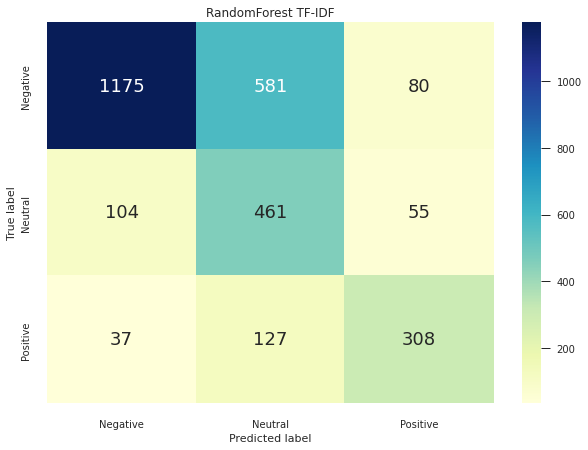

In [99]:
make_confusion_matrix(rf_class_randomCV, 
                      X_test=X_test,y_test=y_test,
                      desc="RandomForest TF-IDF",
                      CATEGORIES=["Negative", "Neutral", "Positive"])

In [100]:
rf_class_randomCV.feature_importances_

array([6.22783670e-04, 0.00000000e+00, 4.53396731e-04, ...,
       0.00000000e+00, 1.64537266e-05, 0.00000000e+00])

In [101]:
tf_idf_vectorizer.get_feature_names()

['aa',
 'aadvantage',
 'able',
 'about',
 'abq',
 'absolute',
 'absolutely',
 'absurd',
 'abt',
 'ac',
 'accept',
 'acceptable',
 'access',
 'accommodate',
 'accommodations',
 'accord',
 'account',
 'acct',
 'accurate',
 'across',
 'act',
 'action',
 'actual',
 'actually',
 'add',
 'additional',
 'address',
 'admirals',
 'admit',
 'adopt',
 'advance',
 'advantage',
 'advertise',
 'advice',
 'advise',
 'advisory',
 'affect',
 'afford',
 'after',
 'afternoon',
 'again',
 'age',
 'agency',
 'agent',
 'agents',
 'ago',
 'agree',
 'ah',
 'ahead',
 'ahold',
 'air',
 'aircraft',
 'airfare',
 'airline',
 'airlines',
 'airplane',
 'airport',
 'airports',
 'airways',
 'albany',
 'alert',
 'alist',
 'all',
 'alliance',
 'allow',
 'almost',
 'alone',
 'along',
 'alot',
 'already',
 'alright',
 'also',
 'alternate',
 'although',
 'always',
 'amaze',
 'america',
 'american',
 'americanairlines',
 'among',
 'amount',
 'amp',
 'an',
 'and',
 'angry',
 'anniversary',
 'announce',
 'announcement',
 'ann

In [102]:
# re-usable function


def feature_importance_in_tree(dTree, 
                               vectorizer,
                               feature_names=[], 
                               no_top_features=20,
                               model_name=""):
    """
    Description:
        Display importance of features in the tree building , by Gini importance
    Parameters:
        dTree : Descision Tree Model
        feature_names : list of independent variable names
    Returns:
        dataframe containing the feature importance, sorted decending
    """

    df_imp = pd.DataFrame(
        dTree.feature_importances_,
        columns=["Importance"],
        index=feature_names,
    ).sort_values(by="Importance", ascending=False)

    df_imp = df_imp.head( no_top_features )

    names = vectorizer.get_feature_names()
    # count = 0
    names_dict = {}
    for i in np.arange(0,len(names)):
      # print(names[i])
      names_dict[i] = names[i]

    # print(names_dict)

    df_imp["Feature"]= df_imp.index.map(names_dict)

    print(df_imp)

    # sns.set_context("talk")  # talk : bolds the plots

    print("*"*60)
    print("The plot of Feature Importance, top", 
          str(no_top_features))

    # fig, axs = plt.subplots(figsize=(20, 5))
    # df_imp.plot(kind="bar", ax=axs, color="Green")
    # plt.title("Feature Importances")
    # plt.xlabel("Relative Importance")
    sns.catplot(
        data=df_imp,
        y="Feature",
        x="Importance",
        kind="bar",
        height=10
    )
    plt.show()

    # sns.set_context("notebook")  # reset to normal

    wordcloud = WordCloud(
                      background_color='grey',
                      width=2000,
                      height=1500,
    ).generate(" ".join(df_imp["Feature"]))

    print("*"*60)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.figure(1, figsize=(20, 15))
    plt.title('Top '+ str(no_top_features) +\
              ' features WordCloud', fontsize=30)
    plt.axis("off")
    plt.show()              

    return df_imp




      Importance Feature    
1734 0.2431            thank
1174 0.0710              not
772  0.0417            great
1028 0.0364             love
473  0.0294            delay
794  0.0279            happy
824  0.0245             hold
273  0.0210           cancel
842  0.0195            hours
275  0.0148           cannot
1890 0.0145             wait
436  0.0140         customer
75   0.0127            amaze
206  0.0121             best
160  0.0118          awesome
268  0.0103             call
1968 0.0099            would
687  0.0086           flight
816  0.0084               hi
1964 0.0082            worst
769  0.0082             good
172  0.0063              bag
1021 0.0056             lose
1318 0.0055           please
1148 0.0051             need
271  0.0051              can
190  0.0050               be
757  0.0049              get
1989 0.0046              you
1109 0.0044             miss
53   0.0044          airline
110  0.0043       appreciate
841  0.0041             hour
1555 0.0041   

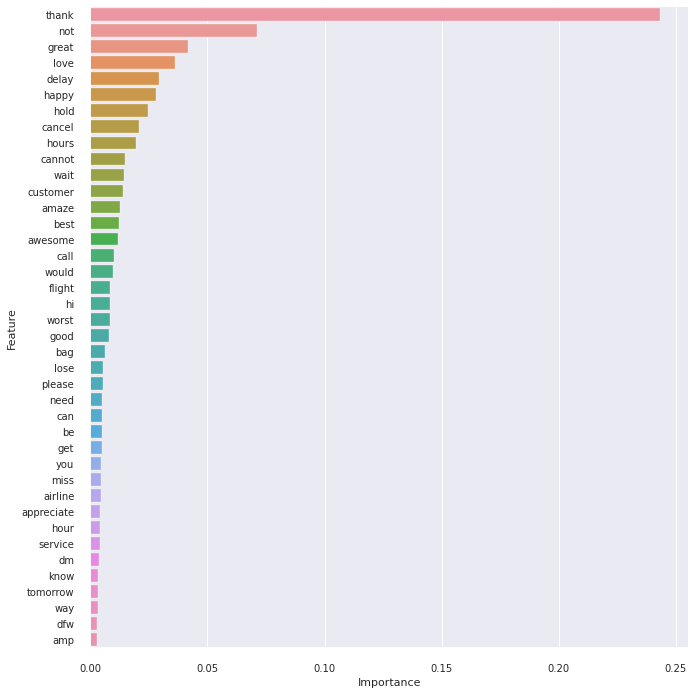

************************************************************


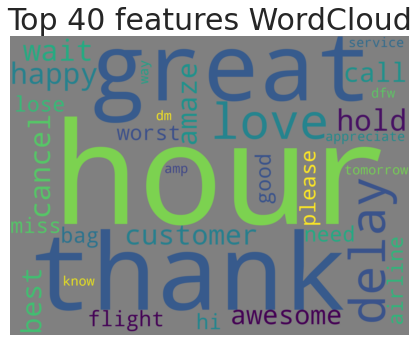

In [103]:
df_imp = feature_importance_in_tree(
    dTree=rf_class_randomCV, 
    vectorizer=tf_idf_vectorizer,
    feature_names=X_train.columns, 
    no_top_features = 40,
    model_name="RandomForest TF-IDF"
)

In [159]:
df_imp

Importance Feature  
1734 0.2547          thank
1174 0.0665            not
772  0.0448          great
1028 0.0355           love
473  0.0287          delay
824  0.0274           hold
794  0.0266          happy
273  0.0199         cancel
842  0.0174          hours
1890 0.0171           wait
436  0.0144       customer
75   0.0144          amaze
275  0.0130         cannot
206  0.0123           best
160  0.0105        awesome
816  0.0103             hi
1968 0.0078          would
1964 0.0078          worst
268  0.0067           call
769  0.0064           good
687  0.0063         flight
172  0.0057            bag
1109 0.0051           miss
1555 0.0047        service
271  0.0046            can
1021 0.0045           lose
525  0.0041             dm
190  0.0039             be
1148 0.0039           need
1780 0.0039       tomorrow
841  0.0036           hour
53   0.0033        airline
421  0.0031           crew
1924 0.0030           what
1151 0.0029          never
1318 0.0028         please
757  0.0028            get
498  0.0023            dfw
970  0.0022           late
1769 0.0021           time

## 6.2 Random Forest Model with Count Vectorizer (Bag of Words) features

In [104]:
rf_bow = RandomForestClassifier(
    random_state=10,
    n_estimators=20, 
    n_jobs=4,
    class_weight="balanced"
)  
rf_bow.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [105]:
%%time
# Grid of parameters to choose from
## add from article
parameters = {
    "bootstrap": [True],
    "max_depth" : np.arange(8,18),
    "max_features": [ 0.7, 0.8, 0.9],
    "max_samples": [ 0.7, 0.8, 0.9],
    "n_estimators": [ 10, 20, 30, 40],
    "min_impurity_decrease": [0.0001, 0.001],
    'warm_start': [True],
    "criterion": ["entropy","gini"]
}

rf_bow.fit(X_train_bow, y_train_bow) # RandomForest does not need feature scaling

# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score, average = 'macro'),
#            'recall': make_scorer(recall_score, average = 'macro'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')
#           }

# scoring = make_scorer(f1_score, average = 'weighted')
scoring = make_scorer(accuracy_score)


# Run the Randomized search
randomCV_obj_bow = RandomizedSearchCV(
            estimator=rf_bow, 
            param_distributions=parameters, 
            scoring = scoring,
            # scoring = {"Recall": "recall", "AUC": "roc_auc" },
            # refit="AUC", 
            cv=5, 
            n_iter=10)

randomCV_obj_bow = randomCV_obj_bow.fit(X_train_bow, 
                                        y_train_bow)

# Set the clf to the best combination of parameters
rf_bow_randomCV = randomCV_obj_bow.best_estimator_

# Fit the best algorithm to the data.
rf_bow_randomCV.fit(X_train_bow, y_train_bow)

CPU times: user 1min 30s, sys: 2.34 s, total: 1min 32s
Wall time: 10min 26s


In [106]:
rf_bow_randomCV.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 17,
 'max_features': 0.9,
 'max_leaf_nodes': None,
 'max_samples': 0.8,
 'min_impurity_decrease': 0.0001,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': True}

In [107]:
#test dataset is unseen

df_score_rf_bow_randomCV = get_metrics_score(
    rf_bow_randomCV,
    X_train_bow,
    X_test_bow,  # unseen data
    y_train_bow,
    y_test_bow,  # unseen data
    desc="RandomForest BOW",
    # roc=True,
)

  Description        Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest BOW 0.6776          0.6605         0.7795             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7523          0.6776        0.6605       0.6986    0.6819    


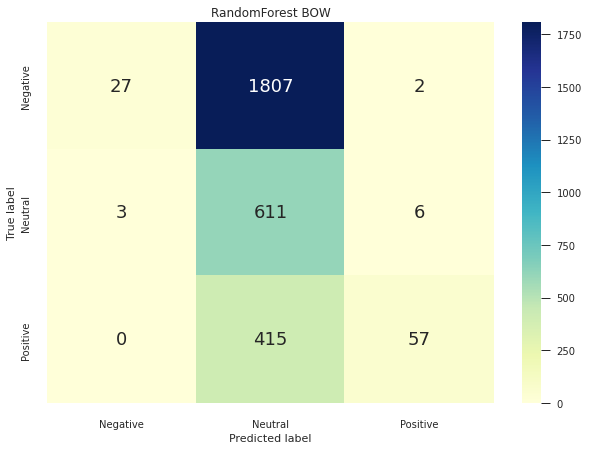

In [108]:
make_confusion_matrix(rf_bow_randomCV, 
                      X_test=X_test,y_test=y_test,
                      desc="RandomForest BOW",
                      CATEGORIES=["Negative", "Neutral", "Positive"])

In [109]:
df_scores = pd.concat([df_score_rf_randomCV, df_score_rf_bow_randomCV],
                      axis=0,
                      ignore_index=True)
df_scores.sort_values(by=["Accuracy-Test","F1-Test"], ascending=False)

Description           Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest TF-IDF 0.6890          0.6639         0.7944             
1     RandomForest BOW 0.6776          0.6605         0.7795             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7554          0.6890        0.6639       0.7099    0.6852    
1 0.7523          0.6776        0.6605       0.6986    0.6819

      Importance Feature  
1734 0.2547          thank
1174 0.0665            not
772  0.0448          great
1028 0.0355           love
473  0.0287          delay
824  0.0274           hold
794  0.0266          happy
273  0.0199         cancel
842  0.0174          hours
1890 0.0171           wait
436  0.0144       customer
75   0.0144          amaze
275  0.0130         cannot
206  0.0123           best
160  0.0105        awesome
816  0.0103             hi
1968 0.0078          would
1964 0.0078          worst
268  0.0067           call
769  0.0064           good
687  0.0063         flight
172  0.0057            bag
1109 0.0051           miss
1555 0.0047        service
271  0.0046            can
1021 0.0045           lose
525  0.0041             dm
190  0.0039             be
1148 0.0039           need
1780 0.0039       tomorrow
841  0.0036           hour
53   0.0033        airline
421  0.0031           crew
1924 0.0030           what
1151 0.0029          never
1318 0.0028         please
7

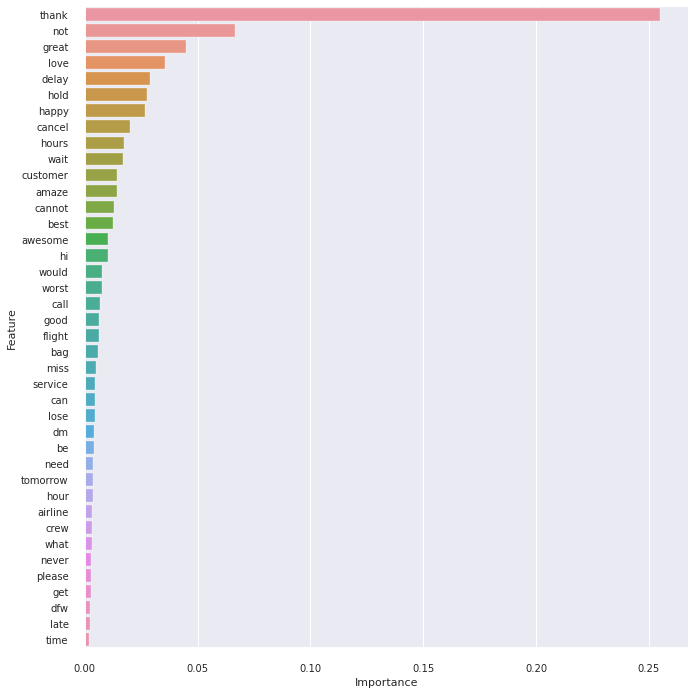

************************************************************


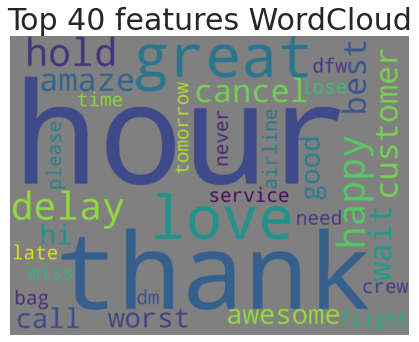

In [110]:
df_imp = feature_importance_in_tree(
    dTree=rf_bow_randomCV, 
    vectorizer=bow_vec,
    feature_names=X_train_bow.columns, 
    no_top_features = 40,
    model_name="RandomForest BOW"
)


In [160]:
df_imp

Importance Feature  
1734 0.2547          thank
1174 0.0665            not
772  0.0448          great
1028 0.0355           love
473  0.0287          delay
824  0.0274           hold
794  0.0266          happy
273  0.0199         cancel
842  0.0174          hours
1890 0.0171           wait
436  0.0144       customer
75   0.0144          amaze
275  0.0130         cannot
206  0.0123           best
160  0.0105        awesome
816  0.0103             hi
1968 0.0078          would
1964 0.0078          worst
268  0.0067           call
769  0.0064           good
687  0.0063         flight
172  0.0057            bag
1109 0.0051           miss
1555 0.0047        service
271  0.0046            can
1021 0.0045           lose
525  0.0041             dm
190  0.0039             be
1148 0.0039           need
1780 0.0039       tomorrow
841  0.0036           hour
53   0.0033        airline
421  0.0031           crew
1924 0.0030           what
1151 0.0029          never
1318 0.0028         please
757  0.0028            get
498  0.0023            dfw
970  0.0022           late
1769 0.0021           time

# 7. Word2Vec Model

skip gram word vectorization.

The model taken into account sequence of words together, trying to understand the context of sentences.


In [111]:
%%time
# tokenize
clean_tweet_tokenized = \
    df_clean_tweet["clean_text"].apply(
        lambda x : str(x).split() 
    )

clean_tweet_tokenized

CPU times: user 19.6 ms, sys: 3.03 ms, total: 22.6 ms
Wall time: 22.5 ms


In [112]:
print(len(df_clean_tweet["clean_text"]),df_clean_tweet.shape[0])

14640 14640


In [113]:
%%time
# size: The number of dimensions of the embeddings and the default is 100.
# window: The maximum distance between a target word and words around the target word. The default window is 5.
# min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
# workers: The number of partitions during training and the default workers is 3.
# sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.
# min_count: Ignores all words with total frequency lower than 2.  

model_w2v = Word2Vec(clean_tweet_tokenized, 
                 size= 200,
                 workers=2, # Google Colab
                 window =5, 
                 min_count=1, # Ignores all words with total frequency lower than 2.  
                 sg = 1)

model_w2v.train(clean_tweet_tokenized,
                total_examples = df_clean_tweet.shape[0],
                epochs=20)

CPU times: user 24 s, sys: 134 ms, total: 24.1 s
Wall time: 13.6 s


In [114]:
model_w2v.wv.similarity('food','drink')

0.47744283

In [115]:
model_w2v.wv.similarity('obnoxious','bad')

0.35006878

In [116]:
model_w2v.wv.similarity('flight','airlines')

0.2968791

In [117]:
model_w2v.wv.similarity('ppl','people')

0.37938622

In [118]:
model_w2v.wv.similarity('hundred_points','happy')

0.25838858

In [119]:
model_w2v.most_similar("airlines")[:5]

[('pain', 0.5223557949066162),
 ('turkish', 0.5176053047180176),
 ('yours', 0.5155428647994995),
 ('american', 0.5137763619422913),
 ('greati', 0.5097218751907349)]

In [120]:
model_w2v.most_similar("happy")[:5]

[('nycgt', 0.4741242527961731),
 ('dx', 0.4628419876098633),
 ('justdoit', 0.4546804428100586),
 ('smite', 0.4541279673576355),
 ('youknowyouwantto', 0.45362797379493713)]

In [121]:
model_w2v.most_similar("bad")[:5]

[('impair', 0.5555636882781982),
 ('topdown', 0.5463052988052368),
 ('minutesi', 0.5392499566078186),
 ('senseless', 0.538774311542511),
 ('amshould', 0.5357346534729004)]

In [122]:
model_w2v.most_similar("thank")[:5]

[('condolences', 0.6326899528503418),
 ('thanx', 0.6104599237442017),
 ('greatly', 0.6085929870605469),
 ('recovery', 0.6069194078445435),
 ('jh', 0.5983676910400391)]

In [123]:
model_w2v.most_similar("delay")[:5]

[('aircrft', 0.5943775773048401),
 ('lag', 0.5753385424613953),
 ('chuckhole', 0.5750110149383545),
 ('atc', 0.5702741742134094),
 ('todayall', 0.5701172351837158)]

## 7.1  Word2Vec Feature Enginerring



In [124]:

def word_vector(tokens, size):
    """
      Desc: 
        mean of all the word vectors present in the tweet
    """
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [125]:
# Note : following transformation of mean vector is taking place within
# each record, not influenced by another record, no chance of data-leakage

wordvec_arrays = np.zeros((df_clean_tweet.shape[0],
                           200)) 

for i in range(df_clean_tweet.shape[0]):
    wordvec_arrays[i,:] = word_vector(
        clean_tweet_tokenized[i], 
        200)
wordvec_df = pd.DataFrame(wordvec_arrays,
                          index=df_clean_tweet.index,)
wordvec_df.shape

(14640, 200)

## 7.2 Word2Vec Data Split

In [126]:
%%time

# Split dataset into train and test

X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(
    pd.DataFrame( wordvec_df, 
                 index=df_clean_tweet.index,
                 dtype="float16"), 
    y, 
    test_size=0.20, 
    random_state=10,
    stratify=y)


print("X_train_w2v", X_train_w2v.shape)
print("X_test_w2v", X_test_w2v.shape)
print("y_train_w2v", y_train_w2v.shape)
print("y_test_w2v", y_test_w2v.shape)

X_train_w2v (11712, 200)
X_test_w2v (2928, 200)
y_train_w2v (11712,)
y_test_w2v (2928,)
CPU times: user 54.3 ms, sys: 3.01 ms, total: 57.3 ms
Wall time: 55.3 ms


In [127]:
# check if the distribution of target classes are preserved after dataset split

print(y.value_counts(normalize=True))
print("="*40)
print(y_train_w2v.value_counts(normalize=True))
print("="*40)
print(y_test_w2v.value_counts(normalize=True))
print("="*40)

0   0.6269
1   0.2117
2   0.1614
Name: airline_sentiment, dtype: float64
0   0.6269
1   0.2117
2   0.1615
Name: airline_sentiment, dtype: float64
0   0.6270
1   0.2117
2   0.1612
Name: airline_sentiment, dtype: float64


In [128]:
X_train_w2v.sample(10)

0       1       2       3       4       5       6      7       8       \
12582 -0.2441  0.1003 -0.1855 -0.2103 -0.2124 -0.0319 0.0141  0.0101 -0.0234   
6302   0.0410  0.1915 -0.0983 -0.2140  0.0350  0.2500 0.1398 -0.1785 -0.1144   
12696  0.0512  0.3193 -0.0692 -0.1204 -0.1061  0.0840 0.0177 -0.0182 -0.3303   
13539 -0.0677  0.1870 -0.0212 -0.0817 -0.2469  0.2345 0.0854  0.0339 -0.1619   
10042 -0.1511 -0.0367 -0.0652  0.0465 -0.1804  0.1901 0.0051  0.0414 -0.1548   
6512  -0.1144  0.1958 -0.0655 -0.0516 -0.1256  0.1561 0.0731  0.0653 -0.1003   
12147  0.0203  0.2106 -0.2135 -0.1404 -0.2050  0.2147 0.0312 -0.0358 -0.1732   
10982 -0.1340  0.0807 -0.1421 -0.0314 -0.2324  0.0168 0.1223 -0.1155 -0.1169   
7260  -0.1628  0.1317 -0.0814  0.1417 -0.3381  0.0566 0.2157 -0.0371 -0.1556   
8652  -0.1708  0.1108 -0.0635 -0.0201 -0.1324  0.0969 0.0063  0.1104 -0.1979   

       9       10     11     12      13      14     15      16      17      \
12582 -0.0456 0.1393 0.1519  0.0535 -0.0399 0.2771 -0.1494 -0.1107 -0.0910   
6302   0.0426 0.0138 0.1072 -0.3352  0.1025 0.2413 -0.2452 -0.0246 -0.1434   
12696  0.0500 0.1179 0.1051 -0.1680 -0.1094 0.2664 -0.0603 -0.1895 -0.1539   
13539 -0.0846 0.2705 0.0389  0.0306 -0.0369 0.4036 -0.0869  0.0093 -0.1565   
10042 -0.0255 0.3545 0.1846  0.1234 -0.0023 0.5210 -0.0081 -0.2180 -0.0369   
6512  -0.0581 0.1437 0.2488  0.0525 -0.1102 0.4558 -0.0608 -0.0337 -0.1456   
12147 -0.1610 0.1125 0.1287  0.0475 -0.2581 0.4839  0.0504 -0.0305 -0.2462   
10982 -0.1220 0.2466 0.1851 -0.0273 -0.1685 0.4307  0.1176 -0.1119 -0.1434   
7260   0.0102 0.3301 0.1580 -0.0364 -0.0065 0.4429 -0.0620 -0.3423 -0.0880   
8652  -0.0566 0.1572 0.1782  0.0881 -0.0562 0.1531 -0.0411 -0.0633 -0.0710   

       18      19      20      21      22      23      24      25      26     \
12582  0.0677  0.0760 -0.0511 -0.1028 -0.0414  0.1354 -0.0069 -0.0498 0.2766   
6302   0.1100  0.0882  0.1992 -0.0812  0.0787  0.4004 -0.1805 -0.0056 0.2961   
12696  0.2306  0.1263 -0.1584 -0.1026 -0.0033  0.1144 -0.4731 -0.1200 0.2185   
13539  0.0513 -0.0394 -0.1421 -0.1772 -0.1406  0.0769 -0.1376 -0.1708 0.1620   
10042  0.2198  0.0373 -0.2335 -0.2595 -0.2263  0.0919 -0.1674 -0.0487 0.0673   
6512   0.0038  0.0040 -0.1848 -0.2646 -0.2837  0.0998 -0.1357 -0.0361 0.1764   
12147  0.2571  0.0526 -0.1373 -0.2400 -0.1199 -0.0661 -0.1550  0.0222 0.2332   
10982  0.1570  0.0540 -0.3162 -0.1644 -0.2070  0.1813 -0.1268 -0.0351 0.2048   
7260  -0.0077  0.0450 -0.0610 -0.3142 -0.0947  0.0593  0.0005  0.1276 0.2266   
8652  -0.0206  0.1499 -0.0919  0.0150 -0.0041  0.1259 -0.2384  0.0269 0.2422   

       27      28      29      30      31      32      33      34      35      \
12582  0.0170  0.1923 -0.1649 -0.0137  0.1401  0.1204 -0.3149  0.0097 -0.0783   
6302   0.1727  0.1328 -0.1466  0.0875 -0.0005  0.1299 -0.2761 -0.1843 -0.1749   
12696  0.0190 -0.0033 -0.1305  0.2131  0.0839  0.1396 -0.0737 -0.2583  0.0579   
13539  0.0704 -0.0050 -0.0685  0.0740  0.0217  0.0413 -0.1210  0.0250 -0.0040   
10042  0.1002 -0.0331 -0.1885 -0.0043 -0.0558 -0.0664 -0.0149 -0.0218  0.0451   
6512  -0.0292  0.0581 -0.1886  0.0516 -0.0405  0.0569 -0.1857  0.0102 -0.1008   
12147  0.1019  0.1105 -0.0331  0.1177  0.1453  0.1375 -0.0845 -0.0652 -0.0143   
10982  0.1032 -0.0444 -0.0274  0.1082  0.0021  0.0558 -0.2352  0.0604 -0.0820   
7260   0.2537 -0.2411 -0.0044  0.0831 -0.0327  0.0086 -0.2952 -0.0253  0.1296   
8652   0.1267  0.0330 -0.1855 -0.0612  0.0435 -0.0241 -0.2896 -0.0220  0.1066   

       36      37      38     39      40     41      42     43      44      \
12582  0.0519 -0.0286 0.1541  0.1205 0.2961  0.1364 0.1433  0.1925  0.0789   
6302   0.3535 -0.0180 0.3740  0.2383 0.3240 -0.1713 0.0570 -0.0444  0.0694   
12696 -0.0115 -0.1400 0.3579 -0.0435 0.1644 -0.0394 0.1024 -0.2290 -0.0084   
13539 -0.1187 -0.0478 0.3127  0.1671 0.2307  0.1135 0.1791 -0.1482 -0.0763   
10042 -0.1018 -0.0091 0.3049  0.1814 0.0485  0.1705 0.1605 -0.1616  0.0579   
6512  -0.0585  0.0701 0.15

## 7.3 Random Forest Model with Word2Vec 

In [129]:
rf_w2v = RandomForestClassifier(
    random_state=10,
    n_estimators=20, 
    n_jobs=4,
    class_weight="balanced"
)  
rf_w2v.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [130]:
%%time
# Grid of parameters to choose from
## add from article
parameters = {
    "bootstrap": [True],
    "max_depth" : np.arange(5,15),
    "max_features": [ 0.7, 0.8, 0.9],
    "max_samples": [ 0.7, 0.8, 0.9],
    "n_estimators": [10, 20, 40, 80],
    "min_impurity_decrease": [0.0001, 0.001],
    'warm_start': [True],
    "criterion": ["entropy","gini"]
}

rf_w2v.fit(X_train_w2v, y_train_w2v) # RandomForest does not need feature scaling

# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score, average = 'macro'),
#            'recall': make_scorer(recall_score, average = 'macro'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')
#           }


# would reduce overfitting
# scoring ={
#     "accuracy": make_scorer(accuracy_score),
#     "f1_weighted" : make_scorer(f1_score, average = "weighted") 
# }
scoring = make_scorer(accuracy_score)

# Run the Randomized search
randomCV_obj_w2v = RandomizedSearchCV(
            estimator=rf_w2v, 
            param_distributions=parameters, 
            scoring = scoring,
            # scoring = {"Recall": "recall", "AUC": "roc_auc" },
            # refit="f1_weighted", 
            cv=5, 
            n_iter=10)

randomCV_obj_w2v = randomCV_obj_w2v.fit(
                    X_train_w2v, y_train_w2v)

# Set the clf to the best combination of parameters
rf_w2v_randomCV = randomCV_obj_w2v.best_estimator_

# Fit the best algorithm to the data.
rf_w2v_randomCV.fit(X_train_w2v, y_train_w2v)

CPU times: user 2min 35s, sys: 1.16 s, total: 2min 36s
Wall time: 12min 50s


In [131]:
rf_w2v_randomCV.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 0.8,
 'max_leaf_nodes': None,
 'max_samples': 0.9,
 'min_impurity_decrease': 0.001,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': True}

In [132]:
df_score_rf_w2v = get_metrics_score(
    rf_w2v_randomCV,
    X_train_w2v,
    X_test_w2v,  # unseen data
    y_train_w2v,
    y_test_w2v,  # unseen data
    desc="RandomForest Word2Vec",
    # roc=True,
)
df_score_rf_w2v

  Description             Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest Word2Vec 0.9637          0.7654         0.9641             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7535          0.9637        0.7654       0.9638    0.7545    


Description             Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest Word2Vec 0.9637          0.7654         0.9641             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7535          0.9637        0.7654       0.9638    0.7545

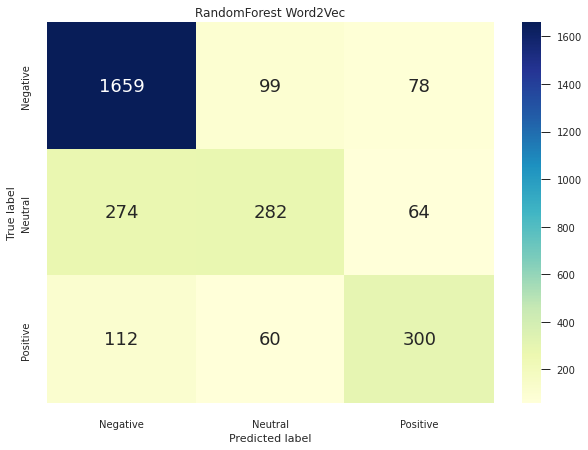

In [133]:
make_confusion_matrix(rf_w2v_randomCV, 
                      X_test=X_test_w2v,y_test=y_test_w2v,
                      desc="RandomForest Word2Vec",
                      CATEGORIES=["Negative", "Neutral", "Positive"])

In [134]:
df_scores = pd.concat([df_scores, df_score_rf_w2v],
                      axis=0,
                      ignore_index=True)
df_scores.sort_values(by=["Accuracy-Test","F1-Test"], ascending=False)

Description             Accuracy-Train  Accuracy-Test  Precision-Train  \
2  RandomForest Word2Vec 0.9637          0.7654         0.9641             
0    RandomForest TF-IDF 0.6890          0.6639         0.7944             
1       RandomForest BOW 0.6776          0.6605         0.7795             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
2 0.7535          0.9637        0.7654       0.9638    0.7545    
0 0.7554          0.6890        0.6639       0.7099    0.6852    
1 0.7523          0.6776        0.6605       0.6986    0.6819

In [135]:
# The Word2vec used transformed vectorizer, 
# whose features does not map to individual words.
# Hence, feature importance wont tell the important words. 

# 8. LSTM Deep Learning Model

Bi directional LSTM (Recurrent Neural Network)

In [200]:
df_clean_tweet.sample(20)

Unnamed: 0  \
2185    2185        
2005    2005        
12788  12788        
11748  11748        
9366    9366        
7203    7203        
4057    4057        
6622    6622        
12056  12056        
1799    1799        
6111    6111        
406      406        
9185    9185        
13956  13956        
12427  12427        
7628    7628        
5029    5029        
6127    6127        
13331  13331        
8602    8602        

      text                                                                                                                                               \
2185        @united please fire the captain of flight 6232 today. He single handedly ruined every passengers day by being a piece of shit. #unitedsucks   
2005                                                      @united now the weight restriction? 'We'll try to get as many of you as we can on this plane'   
12788      @AmericanAir I have got a flight for\nThe next day !! What about a credit ! You guys are a multimillion dollar company give us back a Credit   
11748           @USAirways still can't get a real person on the phone to book a flight. Ready to just go with #jetblue since they care. #usairwayssucks   
9366          @USAirways I want to speak with someone immediately. I am shaking with rage. I offered to hate check my bag and Derrick bussey treated me   
7203                                                           @JetBlue ...and when did your legal department start running your social media channels?   
4057           @united thanks for not getting my BusinessFirst priority tagged bag onto my connecting flight at EWR despite a 2+ hour layover. Nice job   
6622         @SouthwestAir I will.make sure to tell everyone I know about this all around horrible experience. I will also post it on my business page.   
12056                                                                                                                           @AmericanAir thank you!   
1799         @united You cause me to miss my flight telling me it already left when it had not. No empathy from gate staff or crew, no apology. Really?   
6111       @SouthwestAir Thanks for replying, I sen't my conf #! I love aviation and Southwest and all I wanted for my 18th was to fly SWA for the day!   
406                                                                                                                @VirginAmerica great. Well deserved.   
9185   @USAirways done it! Process initiated Saturday morning.  Can't get info with website issues &amp; inadequate phone coverage.  How 2 get update??   
13956          @AmericanAir Hi, I have my name, email, and AAdvantage #, but website won't let me reset password. Can we troubleshoot together? Thanks!   
12427        @AmericanAir the motor that usually starts the engine is broke and @CVGairport ground crew failed to do it on time, per pilot #maintenance   
7628                                                                                                                     @JetBlue we need an ETA please   
5029                            @SouthwestAir I was never able to talk so someone so had to buy another new ticket. Will be calling shortly for refund.   
6127                                                                               @SouthwestAir Thanks!!! :)  It is good to air on the side of caution   
13331                                                                   @AmericanAir how we looking? We going to be able to get out on time? #flight353   
8602                                                         @JetBlue I may not make my connection and need to find out my options, yet no one is here.   

      airline_sentiment  \
2185   negative           
2005   negative           
12788  negative           
11748  negative           
9366   negative           
7203    neutral           
4057   positive           
6622   negative           
12056  positive           
1799   negative           
6111   posit

## 8.1 Data Split into Train, Validation, Test

Split is carried early to avoid data-leakage.

Train :: Validation :: Test = 70 :: 15 :: 15

In [201]:


%%time

# Split dataset into train and test

X_train_lstm, X_test_lstm, \
y_train_lstm, y_test_lstm = train_test_split(
    pd.DataFrame( df_clean_tweet["clean_text"].values.astype('U'), 
                 index=df_clean_tweet.index,
                 ), 
    df_clean_tweet["airline_sentiment"], 
    test_size=0.30, 
    random_state=10,
    stratify=df_clean_tweet["airline_sentiment"])


print("X_train_lstm", X_train_lstm.shape)
print("X_test_lstm", X_test_lstm.shape)
print("y_train_lstm", y_train_lstm.shape)
print("y_test_lstm", y_test_lstm.shape)


X_train_lstm (10248, 1)
X_test_lstm (4392, 1)
y_train_lstm (10248,)
y_test_lstm (4392,)
CPU times: user 36.6 ms, sys: 2.99 ms, total: 39.6 ms
Wall time: 39.6 ms


In [202]:
# check if the distribution of target classes are preserved after dataset split

print(df_clean_tweet["airline_sentiment"].value_counts(
                                            normalize=True))
print("="*40)
print(y_train_lstm.value_counts(normalize=True))
print("="*40)
print(y_test_lstm.value_counts(normalize=True))
print("="*40)

negative   0.6269
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64
negative   0.6270
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64
negative   0.6268
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64


In [203]:
X_train_lstm.sample(10)

0                                                                                                                                    
1853   amaze hospitality helpfulness anthony lastella great staff clapping_hands clapping_hands clapping_hands airplane def fly unite again
1452                                                                                i flight next two weeks happy let us make good memories
6211                                                                                                   please expedite miss bag claim thank
7416                                                                            third straight time flight delay fly guy this last trip you
6541                                                                                                                     charge station san
5738                                                 trouble wifi no matter i get redirect back getconnected page even though say i connect
3308                                                       i standby connect flight st list nudgenudge i tell four slot open save me please
13294                                                          incredibly arrogant thing say i sit ohare wait incompetent airlines refuel a
14103                                                                      not tweet can impersonal responses though impatient customer get
2518                                                              go cancel flight flight today everyone favor get now not stall inevitable

In [204]:
y_test_lstm.sample(10)

4344      neutral
5544     positive
12804    negative
7335     negative
6913      neutral
12149     neutral
6706     negative
7285      neutral
13901    negative
12846     neutral
Name: airline_sentiment, dtype: object

In [205]:
%%time

# Split test dataset into validation and test

X_val_lstm, X_test_lstm, \
y_val_lstm, y_test_lstm = train_test_split(
    X_test_lstm, 
    y_test_lstm, 
    test_size=0.50, 
    random_state=10,
    stratify=y_test_lstm)


print("X_val_lstm", X_val_lstm.shape)
print("X_test_lstm", X_test_lstm.shape)
print("y_val_lstm", y_val_lstm.shape)
print("y_test_lstm", y_test_lstm.shape)

X_val_lstm (2196, 1)
X_test_lstm (2196, 1)
y_val_lstm (2196,)
y_test_lstm (2196,)
CPU times: user 7.63 ms, sys: 0 ns, total: 7.63 ms
Wall time: 6.89 ms


In [206]:
# check if the distribution of target classes are preserved after dataset split

print(df_clean_tweet["airline_sentiment"].value_counts(
                                            normalize=True))
print("="*40)
print(y_train_lstm.value_counts(normalize=True))
print("="*40)
print(y_val_lstm.value_counts(normalize=True))
print("="*40)
print(y_test_lstm.value_counts(normalize=True))
print("="*40)

negative   0.6269
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64
negative   0.6270
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64
negative   0.6270
neutral    0.2117
positive   0.1612
Name: airline_sentiment, dtype: float64
negative   0.6266
neutral    0.2117
positive   0.1617
Name: airline_sentiment, dtype: float64


In [207]:
X_val_lstm.sample(10)

0                                                                                    
5267                  wife try get group clients destination get disconnect hours hold help
12387                              excellent love guy if first class i hug yall see shortly
7158                                       weary_face weary_face weary_face our fleet fleek
3070   huge kudos fo sundays flt sjoiad hand daughter first pair wing keep traditions alive
14352       direct miami w seat rebooked niece tuesday cannot get phone customerservicefail
2874                                                      look like come through thank help
5194                                                               hope apart team job open
3263                                                       still sit wait plane hours waste
2841                                           old school ride home lax houston flyingretro
8167                                          strand passengers not help get another flight

In [208]:
y_val_lstm.sample(10)

451      positive
6744     negative
4640     positive
2835     negative
11991     neutral
10033    negative
95       negative
14217    negative
12159    positive
1433      neutral
Name: airline_sentiment, dtype: object

## 8.2 Tokenization - Data Preprocessing

In [209]:
tokenizer = Tokenizer(num_words = 5000, #vocab_size, input_dim
                      oov_token="<OOV>")

tokenizer.fit_on_texts(X_train_lstm[0])
tokenizer.word_index



{'<OOV>': 1,
 'i': 2,
 'flight': 3,
 'not': 4,
 'get': 5,
 'thank': 6,
 'cancel': 7,
 'service': 8,
 'delay': 9,
 'time': 10,
 'help': 11,
 'you': 12,
 'go': 13,
 'customer': 14,
 'call': 15,
 'fly': 16,
 'us': 17,
 'bag': 18,
 'would': 19,
 'wait': 20,
 'make': 21,
 'hold': 22,
 'hours': 23,
 'need': 24,
 'be': 25,
 'amp': 26,
 'cannot': 27,
 'try': 28,
 'plane': 29,
 'still': 30,
 'one': 31,
 'please': 32,
 'gate': 33,
 'book': 34,
 'seat': 35,
 'say': 36,
 'flightled': 37,
 'take': 38,
 'tell': 39,
 'back': 40,
 'do': 41,
 'change': 42,
 'hour': 43,
 'face': 44,
 'it': 45,
 'phone': 46,
 'check': 47,
 'no': 48,
 'know': 49,
 'late': 50,
 'guy': 51,
 'today': 52,
 'like': 53,
 'work': 54,
 'now': 55,
 'give': 56,
 'airline': 57,
 'miss': 58,
 'ticket': 59,
 'leave': 60,
 'me': 61,
 'way': 62,
 'could': 63,
 'board': 64,
 'airport': 65,
 'want': 66,
 'day': 67,
 'send': 68,
 'travel': 69,
 'hrs': 70,
 'really': 71,
 'sit': 72,
 'great': 73,
 'love': 74,
 'this': 75,
 'never': 76,
 'ha

In [210]:
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_lstm[0])

print(train_sequences[10]), len(train_sequences[10])

[6, 1615, 8, 268, 1998, 1187, 103]


(None, 7)

In [211]:
print(train_sequences[0]), len(train_sequences[0])

[2, 78, 1993, 3977, 741, 762, 2, 872, 2, 466, 2904]


(None, 11)

In [212]:
print(train_sequences[100]), len(train_sequences[100])

[32, 68, 11, 261, 255, 3, 340, 35, 565, 188]


(None, 10)

Data distrubution of sequence length


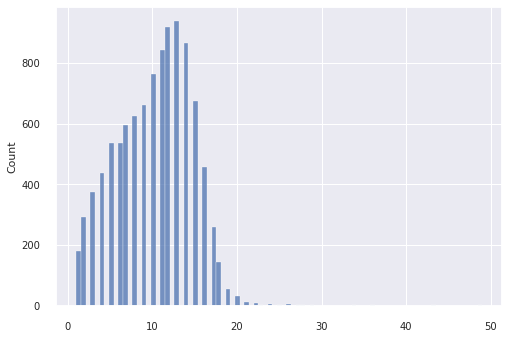

In [213]:
len_train_seq = [ len(i) for i in train_sequences]

print("Data distrubution of sequence length")

sns.histplot(data =len_train_seq);

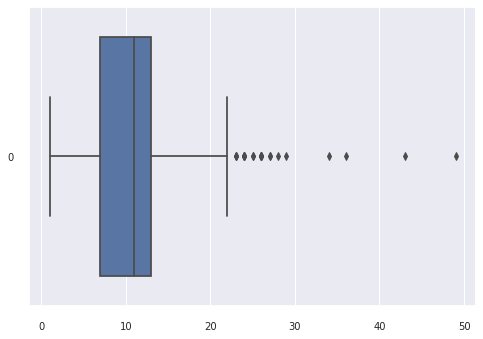

In [214]:
sns.boxplot(data =len_train_seq, orient="h");

### Observation by Sanjib:

1. Most of the lengths of sequences are under 20. 

In [215]:
"""
  IMPORTANT NOTE: 
    We observed that tweets generally have the sentiment 
    expressed towards end of tweet, as conclusion. Hence
    words towards end of tweet are important in sentiment
    classification. 
    We'll go for "pre" padding, and "pre" truncating. 
"""

train_padded = pad_sequences(
    train_sequences, 
    maxlen=20,            # maximum length of all sequences. 
    padding="pre", 
    truncating="pre")

In [216]:
train_padded[10] # length of sequence was 12

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    6, 1615,    8,  268, 1998, 1187,  103], dtype=int32)

In [217]:
# testing a few more samples of padding, 
# comparing with original length of sequence

[ print(
  "length of train_sequence[{}], train_paddded[{}]= {} ".format(
  i,i,train_padded[i]))  for i in [0,10, 100, 200, 500, 1000, 1500]] 

length of train_sequence[0], train_paddded[0]= [   0    0    0    0    0    0    0    0    0    2   78 1993 3977  741
  762    2  872    2  466 2904] 
length of train_sequence[10], train_paddded[10]= [   0    0    0    0    0    0    0    0    0    0    0    0    0    6
 1615    8  268 1998 1187  103] 
length of train_sequence[100], train_paddded[100]= [  0   0   0   0   0   0   0   0   0   0  32  68  11 261 255   3 340  35
 565 188] 
length of train_sequence[200], train_paddded[200]= [   0    0    0    0    0    0    0    0    0    0   73    3 1287 2018
   29    2  102 4073  162  102] 
length of train_sequence[500], train_paddded[500]= [   0    0    0    0    0    0    0    0    0   71 1491   97  615  242
  215  561  582  283   99  215] 
length of train_sequence[1000], train_paddded[1000]= [   0    0    0    0    0    0    0    0   19  208    2   63  233  108
  531    5  651 1515   26  165] 
length of train_sequence[1500], train_paddded[1500]= [   0    0    0    0    0    0    0    0 

[None, None, None, None, None, None, None]

In [218]:


# apply same transformation on the 
# validation and test data set

#### Validation Data
val_sequences = tokenizer.texts_to_sequences(X_val_lstm[0])
val_padded = pad_sequences(val_sequences, 
                            maxlen=20, 
                            padding="pre", 
                            truncating="pre")

print("Val Sequence", len(val_sequences))
print("Val Padded", val_padded.shape)

#### Validation Data
test_sequences = tokenizer.texts_to_sequences(X_test_lstm[0])
test_padded = pad_sequences(test_sequences, 
                            maxlen=20, 
                            padding="pre", 
                            truncating="pre")

print("Test Sequence", len(test_sequences))
print("Test Padded", test_padded.shape)

Val Sequence 2196
Val Padded (2196, 20)
Test Sequence 2196
Test Padded (2196, 20)


In [219]:
# label data encoding starts
y_train_lstm.sample(10)

12561    negative
5738     negative
3073     negative
3880     negative
14026    negative
12699    negative
8929     positive
4155     positive
12250    negative
9560      neutral
Name: airline_sentiment, dtype: object

In [220]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(df_clean_tweet["airline_sentiment"])

training_label_seq = np.array(
    label_tokenizer.texts_to_sequences(y_train_lstm))

val_label_seq = np.array(
    label_tokenizer.texts_to_sequences(y_val_lstm))

test_label_seq = np.array(
    label_tokenizer.texts_to_sequences(y_test_lstm))

label_tokenizer.word_index

{'negative': 1, 'neutral': 2, 'positive': 3}

In [222]:
# testing a few samples

[ print("training_label_seq[{}]={} ; val_label_seq[{}]={}; testing_label_seq[{}]={}".format(
    i,training_label_seq[i],
    i,val_label_seq[i],
    i,test_label_seq[i])) for i in np.arange(5)]

training_label_seq[0]=[1] ; val_label_seq[0]=[2]; testing_label_seq[0]=[1]
training_label_seq[1]=[1] ; val_label_seq[1]=[1]; testing_label_seq[1]=[1]
training_label_seq[2]=[1] ; val_label_seq[2]=[2]; testing_label_seq[2]=[2]
training_label_seq[3]=[1] ; val_label_seq[3]=[2]; testing_label_seq[3]=[1]
training_label_seq[4]=[1] ; val_label_seq[4]=[1]; testing_label_seq[4]=[1]


[None, None, None, None, None]

In [223]:
print(training_label_seq.shape, 
      val_label_seq.shape,
      test_label_seq.shape)

(10248, 1) (2196, 1) (2196, 1)


## 8.3 Build Sequential Model

In [233]:
#Instantiating the Sequential model
model_LSTM = Sequential()                                                                            
#Initializing the embedding layer
model_LSTM.add(Embedding(input_dim=5000,
                    output_dim=64,
                    # 5000, # vocab_size=
                    # 64, embedding_dim=
                    # rnn_units = 64,
                    # BATCH_SIZE=100,
                    # input_length=10,
                    # input_dim=10,
                    # output_dim=10               
                    ))  
#Initializing the dropout layer to avoid the overfitting                                               
model_LSTM.add(Dropout(0.5))  
# Initialization of Bi-directional LSTM Layer                                                                       
model_LSTM.add(Bidirectional(LSTM(64)))  # rnn_units
# softmax converts a vector of values to a probability distribution.                                                 
model_LSTM.add(Dense(4, activation='softmax'))                                                     

model_LSTM.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 516       
Total params: 386,564
Trainable params: 386,564
Non-trainable params: 0
_________________________________________________________________


**Embedding Layer**
- Word embeddings allow the value of the vector’s element to be trained. After training, words with similar meanings often have similar vectors.

**Dropout Layer**
- Adding the dropout layer to combat overfitting.

**Bidirectional LSTM Layer**
- The Bidirectional layer propagates the input forward and backwards through the LSTM layer and then concatenates the output. This helps the LSTM to learn long range dependencies.

**Dense Layer**
- This the final layer, the Dense layer with softmax activation for the multi-class classification.

In [234]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00001,
                              beta_1=0.09,
                              beta_2=0.999,
                              epsilon=1e-07,
                              amsgrad=False,            
                              decay=1e-6)

#crossentropy loss function when there are two or more label classes.

model_LSTM.compile(
    # loss='categorical_crossentropy',  
    loss='sparse_categorical_crossentropy',      
    optimizer=opt,
    metrics=['accuracy'],
)

In [235]:
%%time

# Model hyper parameter tunning 
es = EarlyStopping(monitor='val_loss', min_delta=0.01,
                   mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', 
                     mode='max', verbose=1, save_best_only=True)


history = model_LSTM.fit(train_padded, 
              training_label_seq, 
              epochs=100, 
              validation_data=(val_padded, val_label_seq), 
              verbose=2,
              batch_size=100,
              callbacks=[es, mc],
              use_multiprocessing=True) 

Epoch 1/100
285/285 - 4s - loss: 1.3565 - accuracy: 0.6065 - val_loss: 1.3311 - val_accuracy: 0.6270

Epoch 00001: val_accuracy improved from -inf to 0.62705, saving model to best_model.h5
Epoch 2/100
285/285 - 1s - loss: 1.2932 - accuracy: 0.6270 - val_loss: 1.2412 - val_accuracy: 0.6270

Epoch 00002: val_accuracy did not improve from 0.62705
Epoch 3/100
285/285 - 1s - loss: 1.1460 - accuracy: 0.6270 - val_loss: 1.0446 - val_accuracy: 0.6270

Epoch 00003: val_accuracy did not improve from 0.62705
Epoch 4/100
285/285 - 1s - loss: 1.0089 - accuracy: 0.6270 - val_loss: 0.9846 - val_accuracy: 0.6270

Epoch 00004: val_accuracy did not improve from 0.62705
Epoch 5/100
285/285 - 1s - loss: 0.9675 - accuracy: 0.6270 - val_loss: 0.9536 - val_accuracy: 0.6270

Epoch 00005: val_accuracy did not improve from 0.62705
Epoch 6/100
285/285 - 1s - loss: 0.9435 - accuracy: 0.6270 - val_loss: 0.9343 - val_accuracy: 0.6270

Epoch 00006: val_accuracy did not improve from 0.62705
Epoch 7/100
285/285 - 1s -

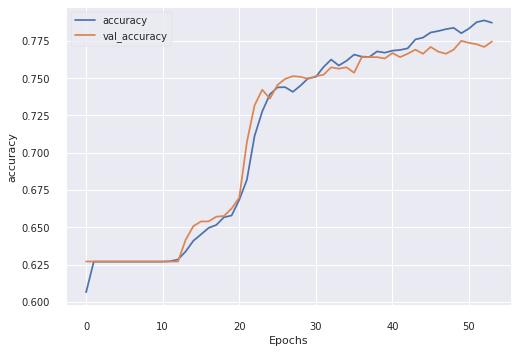

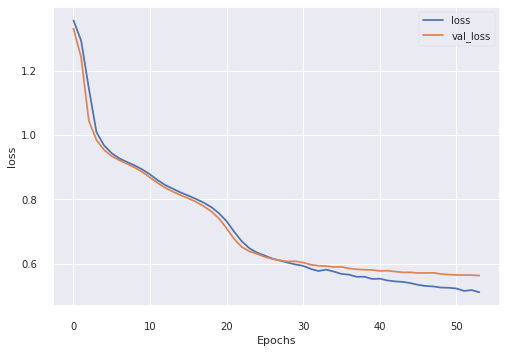

CPU times: user 478 ms, sys: 11.6 ms, total: 490 ms
Wall time: 477 ms


In [236]:

%%time
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [237]:
# The shape of above two graphs are decent 

# Test data set is unseen for model LSTM
score = model_LSTM.evaluate(test_padded, test_label_seq)

69/69 [==============================] - 1s 3ms/step - loss: 0.5687 - accuracy: 0.7646


In [242]:
print(score, score[1]) 

[0.5687012672424316, 0.7645719647407532] 0.7645719647407532


In [239]:
# training accuracy
accuracy_train = history.history.get("accuracy")[-1]
accuracy_train


0.7871779799461365

In [240]:
# validation accuracy
accuracy_val = history.history.get("val_accuracy")[-1]
accuracy_val

0.7745901346206665

In [261]:
%%time 

# re usable funtion to measure various performance KPI

def make_confusion_matrix_LSTM(model, 
            test_padded, test_label_seq, y_test,
            history, desc="", CATEGORIES=[]):
  """
    Description:
        Prints the confusion matrix formatted.
    Parameters:
        model : Sequential = classifier to predict values of X
        X_test: np.array = test set
        y_test : np.array = ground truth
        acc_train : float = accuracy in training dataset
        acc_val : float = accuracy in validation dataset
        CATEGORIES : list of class names
        desc : str = description of model  
    Returns:
        Dataframe containing accuracy, precision, recall values
  """

  
  # print(CATEGORIES)

  # y_test_pred_ln = model.predict(X_test)
  # y_test_pred_classes_ln = np.argmax(y_test_pred_ln, axis=1)

  # training accuracy
  accuracy_train = history.history.get("accuracy")[-1]
  accuracy_train
  print("ACCURACY TRAIN =", accuracy_train) 

  # validation accuracy
  accuracy_val = history.history.get("val_accuracy")[-1]
  accuracy_val
  print("ACCURACY VALIDATION =", accuracy_val) 

  # Test accuracy
  score = model_LSTM.evaluate(test_padded, test_label_seq)
  accuracy_test = score[1]

  # accuracy_test =  accuracy_score(   np.argmax(y_test, axis=1), 
  #     y_test_pred_classes_ln) 
  # print("ACCURACY TEST =", accuracy_test) 

  # Test recall
  # recall_test =  recall_score(   np.argmax(y_test, axis=1), 
  #     y_test_pred_classes_ln, average="weighted") 
  # print("RECALL TEST =", recall_test) 

  # *********************************************************
  # NOTE : Because Average is chosen as "weighted", 
  # Accuracy-Test == Recall-Test
  # *********************************************************
  # precision_test =  precision_score(   np.argmax(y_test, axis=1), 
  #     y_test_pred_classes_ln, average="weighted") 
  # print("PRECISION TEST =", precision_test) 

  # f1_test = f1_score( np.argmax(y_test, axis=1), 
  #               y_test_pred_classes_ln, average='weighted')
  # print("F1 TEST =", f1_test) 

  y_test_pred = model.predict(test_padded)

  # Encode classes into numbers
  y_test_int = y_test.replace({"negative": 1, 
                "neutral": 2, 
                "positive": 3}).astype("uint8")  

  # Confusion Matrix, multi-class
  cf_matrix = confusion_matrix(
              # np.argmax(y_test, axis=1), 
              y_test_int,
              np.argmax(y_test_pred,axis=1)
            )

  # Confusion matrix normalized per category true value
  # cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)


  plt.figure(figsize=(15,10))
  # sns.set_context("talk")  # talk : bolds the plots
  sns.heatmap(cf_matrix, 
              xticklabels=CATEGORIES, 
              yticklabels=CATEGORIES, 
              cmap="YlGnBu", fmt="",
              annot=True)
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  # sns.set_context("notebook")  # talk : bolds the plots

  return pd.DataFrame( {"Description": desc, 
                        "Accuracy-Train": accuracy_train,
                        # "Accuracy-Validation": accuracy_val,
                        "Accuracy-Test": accuracy_test,
                        "Precision-Train": np.nan,
                        "Precision-test" : np.nan,
                        "Recall-Train": np.nan,
                        "Recall-Test": np.nan,
                        "F1-Train": np.nan,
                        "F1-Test": np.nan,
                        },
                      index=[0] )



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


ACCURACY TRAIN = 0.7871779799461365
ACCURACY VALIDATION = 0.7745901346206665
69/69 [==============================] - 0s 3ms/step - loss: 0.5687 - accuracy: 0.7646


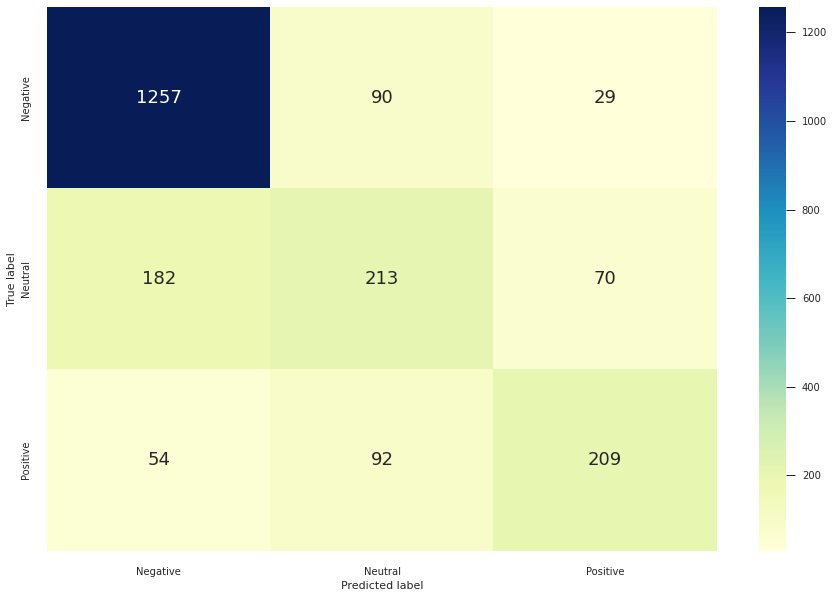

In [262]:
# save the results in a dataframe
df_score_lstm = make_confusion_matrix_LSTM(
                    model=model_LSTM, 
                    test_padded=test_padded, 
                    test_label_seq=test_label_seq, 
                    y_test=y_test_lstm, 
                    history=history,
                    desc="Bi-LSTM", 
                    CATEGORIES=["Negative", "Neutral", "Positive"]) 

In [263]:
df_score_lstm

Description  Accuracy-Train  Accuracy-Test  Precision-Train  Precision-test  \
0  Bi-LSTM    0.7872          0.7646         nan              nan               

   Recall-Train  Recall-Test  F1-Train  F1-Test  
0 nan           nan          nan       nan

In [158]:

# Pretrained model

# 9. Model Selection

In [161]:
df_scores.sort_values(
    by=["Accuracy-Test", "F1-Test"],
    ascending=False,
    ignore_index=False,
    inplace=True,
)
df_scores

Description             Accuracy-Train  Accuracy-Test  Precision-Train  \
2  RandomForest Word2Vec 0.9637          0.7654         0.9641             
0    RandomForest TF-IDF 0.6890          0.6639         0.7944             
1       RandomForest BOW 0.6776          0.6605         0.7795             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
2 0.7535          0.9637        0.7654       0.9638    0.7545    
0 0.7554          0.6890        0.6639       0.7099    0.6852    
1 0.7523          0.6776        0.6605       0.6986    0.6819

In [ ]:
# plot models's performance
fig, axs = plt.subplots(figsize=(20, 5))
df_scores.plot(kind="bar", ax=axs, legend=True)
plt.title("Model Performance ")
plt.xticks(ticks=df_scores.index, labels=df_scores["Description"])
fig.show()

In [ ]:
# in the plot above the top performing model, first one,
#  is also balanced w.r.t. overfitting
df_scores.loc[0,"Description"] # the best performed model

In [ ]:
# save model


# 10. Key Takeaways - Insights



# 11. Appendix

*Next Steps :*

1. In order to productionize the code, the Notebook needs to saved as *.py file (Python).
2. Also, the code needs to be organized in functions and classes (Object Oriented Programming) for re-use. The code of Data Processing can be combined into generic function to apply in number of use cases, e.g. method of class 'EDA' (Exploratory Data Analysis), also useful during model prediction in production.
3. We need to introduce exception handling in the code, try-catch-finally, and logging.
4. We need to save processed data, results, graphs etc. into persistance store (e.g. disk).

Assumption: Productionization of Code is not in the scope of this assignment, even though I am capable of implementing it.

_____________________________________________________________________________________________________
Thank you for your reading of this Notebook. Please share your suggestions, comments to <sanjib007@gmail.com>

_______________________________________________________________________________________________________________

#  --   The End --